# Block Y1B: Creative Brief Template

Please, use this template to write down your solutions to the DataLab Tasks. If you have any questions, please, contact your mentor or the content responsible. 

## Important Notes:
- [ ] Please, rename the file to ```CreativeBrief_<your_name>_<studentnumber>.ipynb``` before submitting it. 
- [ ] Upload this template to the 'Deliverables' folder in your BUas GitHub repository.
- [ ] You are allowed to add as many (Markdown/Python) cells as you need. 
- [ ] If the task requires you to only write code or text, please, delete the unnecessary cell.
- [ ] Your work should be reproducible, meaning that we should be able to run your code in the template and get the same results as you did. Tip: use relative paths to load your data!
- [ ] Ensure that before you hand in the template, you press ```Restart & Run all```; we should be able to see the results of your code in the notebook (i.e., output cells).
- [ ] Ensure that your code in the template is ```error-free```. In other words, we should not see any error messages when we run your code.

## Additional Notes:
- [ ] Starting with week 6 and task 3.4, there will be several iterations in your implemented models based on feature engineering, selection, fine tuning of parameters, and comparing and choosing the best model for each. If you have already completed these steps, remember there is always room for improvement or you can go further and do more implementations. In this template, there are some suggestions for tasks 3.4 and 3.5. However, depending on your analysis and learning, you can do more. 

- [ ] During the week 6 and 7, you will have implementation for mathematics in 3 related jupyter notebooks. After completing that tasks, upload that template to the 'Deliverables' folder in your BUas GitHub repository and add the links in the task 4.1, 4.2 and 4.3.

- [ ] After completing and uploading the FinalReport to the 'Deliverables' folder in your BUas GitHub repository, add the link in the task 5.

## Project Overview
This project focuses on the analysis of diabetes patient data in order to apply in machine learning algorithms. <br>
It will involve the students working on a wide variety of machine learning techniques, ranging from basic data analysis to the optimisation of advanced models. 


## Required Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

## *Task 1: Exploratory Data Analysis (EDA) with Python and SQL
_________


### **Task 1A: Exploratory Data Analysis with SQL**

### Task Description

During the Week 1-DataLab II, you learned how to connect Python or any database tool such as DBeaver, PgAdmin to a database.<br> 
Here you can copy your SQL queries (or markdown text blocks) for Task 1A of exploratory data analysis with SQL.

### Task 1A.1: General Overview of the Data

In [30]:
# Count the total number of records in the encounter table
  
"""

SELECT COUNT(*) AS encounter_count
FROM encounter;

"""

# Check the distribution of different admission types

"""

SELECT description, count(*) AS admission_count
FROM encounter as e
LEFT JOIN admission_type as adt
ON e.admission_type_id = adt.admission_type_id
GROUP BY description
ORDER BY admission_count DESC;

"""
  
# Explore the top discharge dispositions
"""

SELECT description, count(*) AS discharge_count
FROM encounter AS e
LEFT JOIN discharge_disposition AS dd
ON e.discharge_disposition_id = dd.discharge_disposition_id
GROUP BY description
ORDER BY discharge_count DESC;

"""

'\n\nSELECT description, count(*) AS discharge_count\nFROM encounter AS e\nLEFT JOIN discharge_disposition AS dd\nON e.discharge_disposition_id = dd.discharge_disposition_id\nGROUP BY description\nORDER BY discharge_count DESC;\n\n'

### Task 1A.2: Identifying Missing or Anomalous Data

In [31]:
#Check for missing values in the race column (Hint: Count the occurance of each unique value in this column)

"""
SELECT count(*) AS race_count, race
FROm patient
GROUP BY race
"""

#Check for missing or unusual values in the weight column
"""

SELECT weight, count(DISTINCT e.patient_nbr) AS weight_count
FROM encounter AS e
LEFT JOIN patient AS p
ON e.patient_nbr = p.patient_nbr
GROUP BY weight
ORDER BY weight_count DESC

"""


'\n\nSELECT weight, count(DISTINCT e.patient_nbr) AS weight_count\nFROM encounter AS e\nLEFT JOIN patient AS p\nON e.patient_nbr = p.patient_nbr\nGROUP BY weight\nORDER BY weight_count DESC\n\n'

### Task 1A.3: Understanding Age Distribution

In [32]:
# Explore the age distribution of the patients

"""

SELECT age, count(DISTINCT e.patient_nbr) AS age_count
FROM encounter AS e
LEFT JOIN patient AS p
ON e.patient_nbr = p.patient_nbr
GROUP BY age
ORDER BY age DESC

"""

'\n\nSELECT age, count(DISTINCT e.patient_nbr) AS age_count\nFROM encounter AS e\nLEFT JOIN patient AS p\nON e.patient_nbr = p.patient_nbr\nGROUP BY age\nORDER BY age DESC\n\n'

### Task 1A.4: Admission Trends by Source and Type

In [33]:
# Analyze how different admission sources contribute to hospital admissions 
# (Hint: Calculate the number of admissions per source)
"""

SELECT description,count(*) AS count_of_admissions_per_source
FROM encounter AS e
LEFT JOIN admission_source AS ads
ON e.admission_source_id = ads.admission_source_id
GROUP BY description
ORDER BY count_of_admissions_per_source DESC;

"""


#Investigate which admission types correspond to specific admission sources
# (Hint: add admission type to your previous query)
"""
SELECT ads.description, adt.description, count(*) AS count_of_admissions_per_source
FROM encounter AS e
LEFT JOIN admission_source AS ads
ON e.admission_source_id = ads.admission_source_id
LEFT JOIN admission_type AS adt
ON e.admission_type_id = adt.admission_type_id
GROUP BY ads.description, adt.description
ORDER BY count_of_admissions_per_source DESC;
"""

'\nSELECT ads.description, adt.description, count(*) AS count_of_admissions_per_source\nFROM encounter AS e\nLEFT JOIN admission_source AS ads\nON e.admission_source_id = ads.admission_source_id\nLEFT JOIN admission_type AS adt\nON e.admission_type_id = adt.admission_type_id\nGROUP BY ads.description, adt.description\nORDER BY count_of_admissions_per_source DESC;\n'

### Task 1A.5: Hospital Stay and Readmission Patterns

In [34]:
# Find the average time in hospital for each admission type

"""
SELECT DISTINCT description, ROUND(AVG(time_in_hospital),2) AS average_time_per_type 
FROM encounter AS e
LEFT JOIN admission_type AS adt
ON e.admission_type_id = adt.admission_type_id
GROUP BY description
ORDER BY average_time_per_type DESC;
"""

#Investigate readmission rates by admission type

"""
SELECT description, COUNT(readmitted) AS rate_of_readmissions
FROM encounter AS e
LEFT JOIN admission_type AS adt
ON e.admission_type_id = adt.admission_type_id
WHERE readmitted NOT LIKE 'NO'
GROUP BY  description
ORDER BY rate_of_readmissions DESC;
"""

"\nSELECT description, COUNT(readmitted) AS rate_of_readmissions\nFROM encounter AS e\nLEFT JOIN admission_type AS adt\nON e.admission_type_id = adt.admission_type_id\nWHERE readmitted NOT LIKE 'NO'\nGROUP BY  description\nORDER BY rate_of_readmissions DESC;\n"

### Task 1A.6: Comparing Admission Types and Outcomes

In [35]:
# Compare discharge dispositions across different admission types

"""
SELECT DISTINCT adt.description AS admission_type_desc,  dd.description AS outcome
FROM encounter AS e
LEFT JOIN discharge_disposition AS dd
ON e.discharge_disposition_id = dd.discharge_disposition_id
LEFT JOIN admission_type AS adt
ON e.admission_type_id = adt.admission_type_id
"""
# Compare readmission count by discharge disposition
"""
SELECT DISTINCT dd.description AS Discharge_Disposition, count(readmitted) readmission_count
FROm encounter AS e
LEFT JOIN discharge_disposition AS dd
ON e.discharge_disposition_id = dd.discharge_disposition_id
WHERE readmitted NOT LIKE 'NO'
GROUP BY dd.description
ORDER BY readmission_count DESC
"""

"\nSELECT DISTINCT dd.description AS Discharge_Disposition, count(readmitted) readmission_count\nFROm encounter AS e\nLEFT JOIN discharge_disposition AS dd\nON e.discharge_disposition_id = dd.discharge_disposition_id\nWHERE readmitted NOT LIKE 'NO'\nGROUP BY dd.description\nORDER BY readmission_count DESC\n"

+++++
### **Task 1B: Exploratory Data Analysis with Python**

### Task Description
Perform comprehensive exploratory data analysis to understand the dataset's characteristics, patterns, and potential challenges. <br>
It is crucial to understand the structure and quality of the dataset before diving into any analysis or modeling.

### 1B.1: Load and Analyse the Dataset Shape:

In [2]:
import pandas as pd

# Load the dataset
diabetes_data = pd.read_csv("../Diabetes/diabetic_data.csv")
# Display first few rows
print(f"First few rows : {diabetes_data.head(6)}")
# Dataset shape
print(f"Shape of data is : {diabetes_data.shape}")
# Column names
print(f"Column names are : {diabetes_data.columns}")

First few rows :    encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   
5         35754     82637451        Caucasian    Male  [50-60)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   
5                  2                         

### 1B.2: Load and Explore a Dataset Using NumPy

In [1]:
import numpy as np

# Load the dataset
data = np.genfromtxt("../Diabetes/diabetic_data.csv", delimiter=',')

# Check the shape of the dataset
print("Dataset shape:", data.shape)

# Preview the first few rows
print("First 5 rows of the dataset:\n", data[0:5])

Dataset shape: (101767, 50)
First 5 rows of the dataset:
 [[          nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan]
 [2.2783920e+06 8.2221570e+06           nan           nan           nan
            nan 6.0000000e+00 2.5000000e+01 1.0000000e+00 1.0000000e+00
            nan           nan 4.1000000e+01 0.0000000e+00 1.0000000e+00
  0.0

### 1B.3: Analysing Data Types:

In [38]:
# Data types
print("Data types:", diabetes_data.info())

# Unique values in categorical columns
diabetes_data_categories = diabetes_data.select_dtypes(include = "object")
for c in diabetes_data_categories:
  print(diabetes_data_categories[c].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

_________
## *Task 2: Data Processing
### Task Description
Create a robust data preprocessing pipeline to handle missing values, encode categorical variables, and scale numerical features.

### **Task 2.1: Initial Cleaning and Pre-processing and Visualisation**

#### 2.1.1: Load and Check for Incorrect Types


In [3]:
# Importing required Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
# Loading the data

healthcare_df = pd.read_csv("../Diabetes/diabetic_data.csv")

# visualise the first few rows of the data
print(healthcare_df.head(5))
print(healthcare_df.shape)

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code         medical_specialty  num_lab_procedures  \
0                 1          ?  Pediatrics-Endocrinolo

#### 2.1.2: Identify and Remove Duplicate Rows

In [40]:
# Identify and Remove Duplicate Rows

print(healthcare_df["patient_nbr"].duplicated().sum())

healthcare_df = healthcare_df.drop_duplicates(subset = "patient_nbr")
healthcare_df.shape

30248


(71518, 50)

#### 2.1.3: EDA with Visualisation

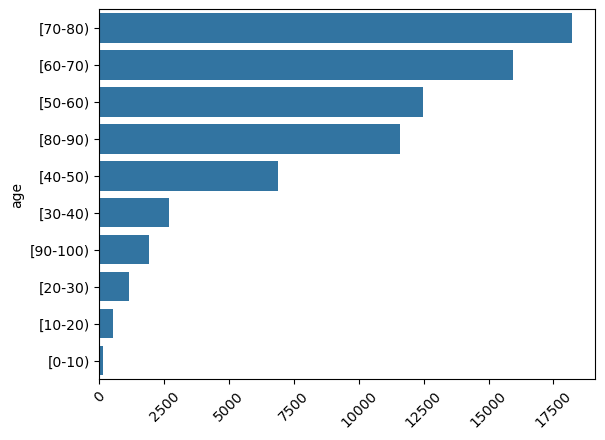

In [41]:
#Create a bar chart to show the number of patients in each age group
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = healthcare_df["age"].value_counts().values, y= healthcare_df["age"].value_counts().index)
plt.xticks(rotation = 45)
plt.show()

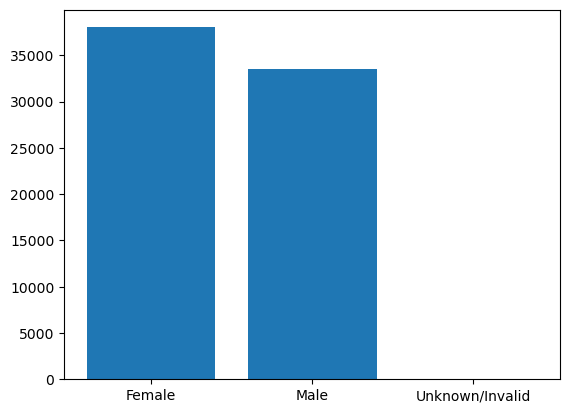

In [42]:
#Show the gender distribution
plt.bar(healthcare_df["gender"].value_counts().index, healthcare_df["gender"].value_counts().values)
plt.show()

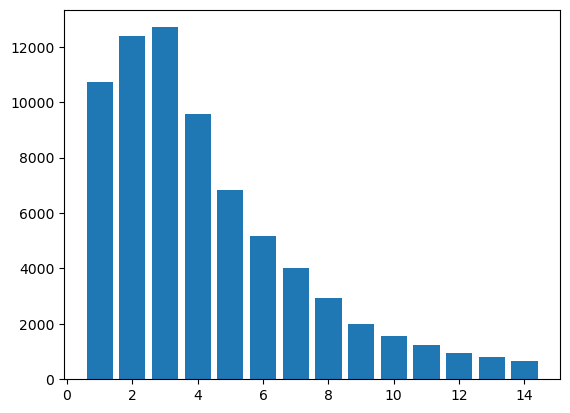

In [43]:
#Create a histogram to show the frequency of different lengths of stay in the hospital
plt.bar(healthcare_df["time_in_hospital"].value_counts().index,healthcare_df["time_in_hospital"].value_counts().values)
plt.show()

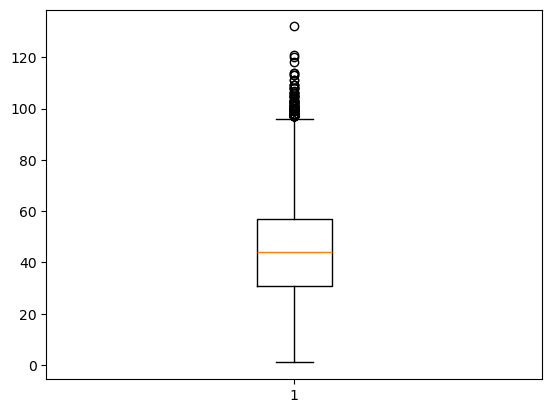

In [44]:
# Use a box plot to show the distribution of num_lab_procedures
plt.boxplot(x=healthcare_df["num_lab_procedures"])
plt.show()

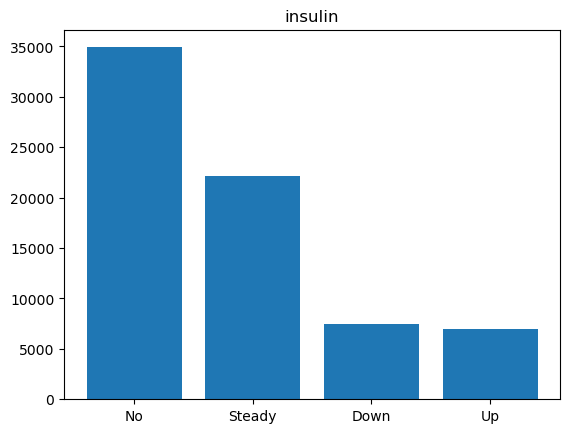

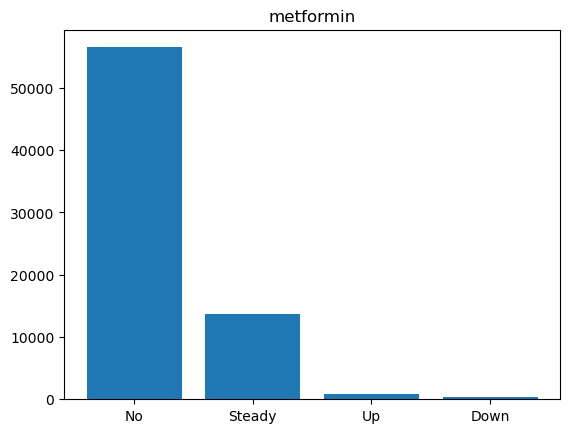

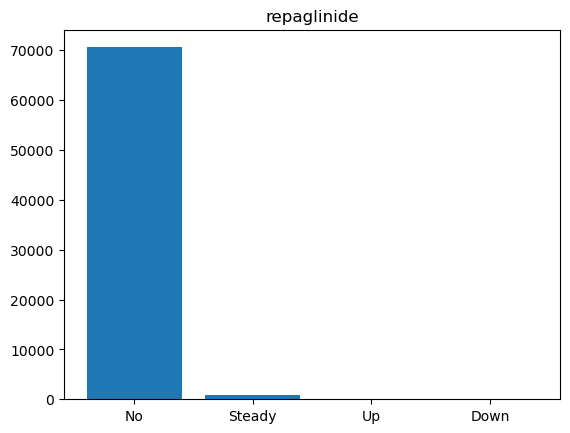

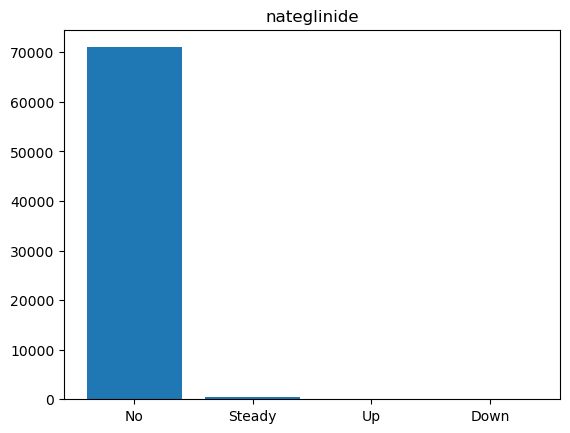

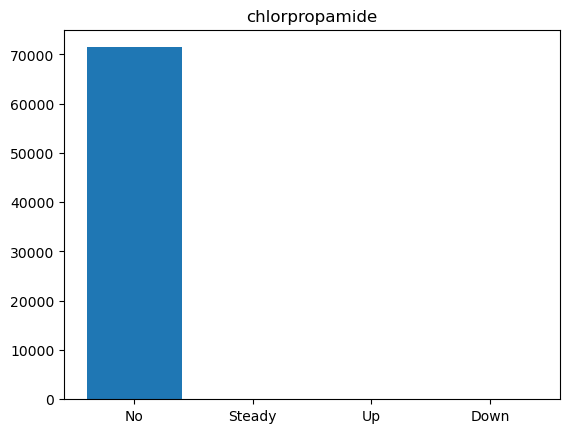

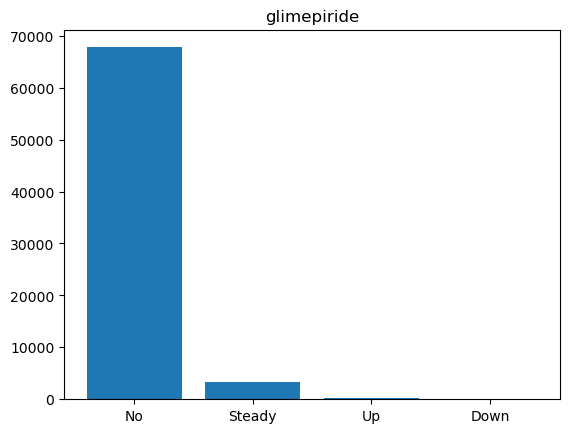

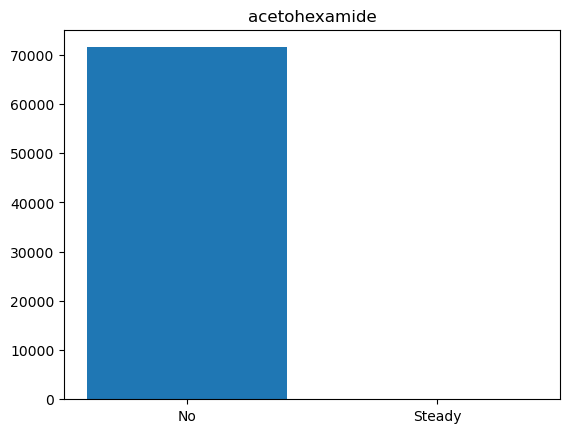

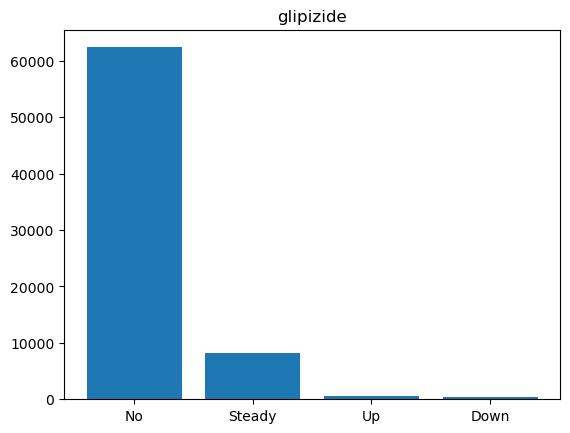

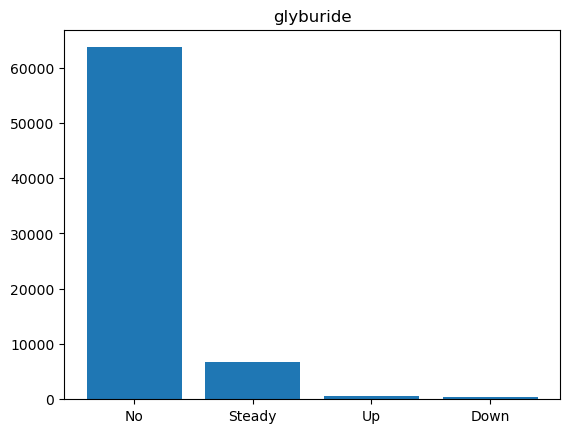

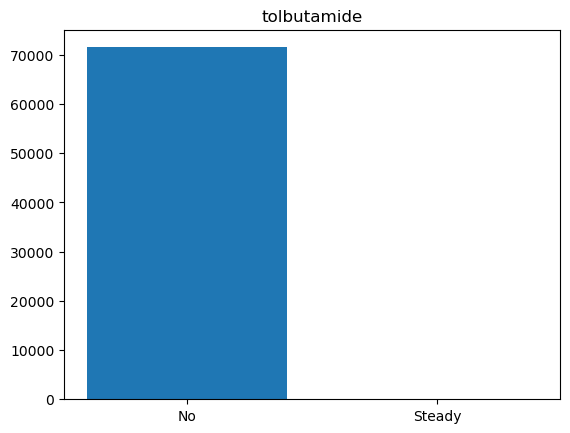

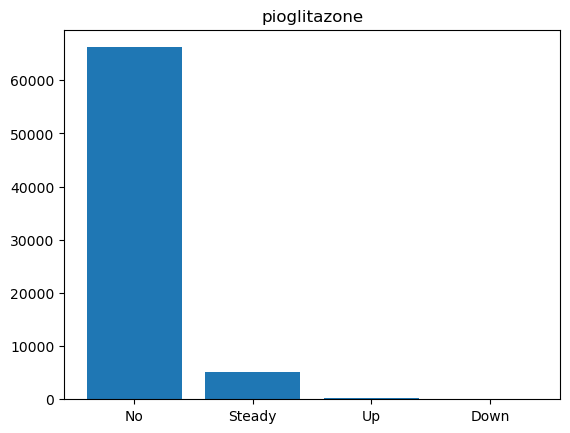

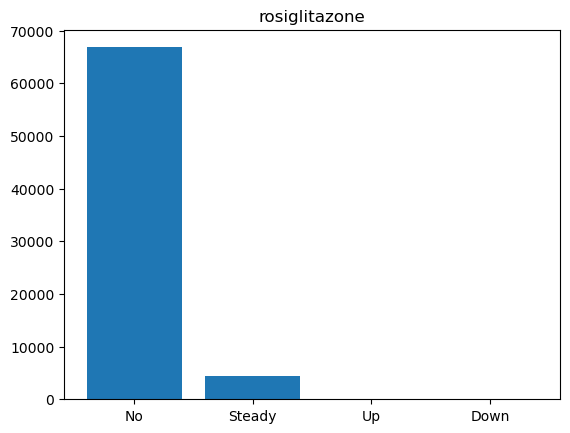

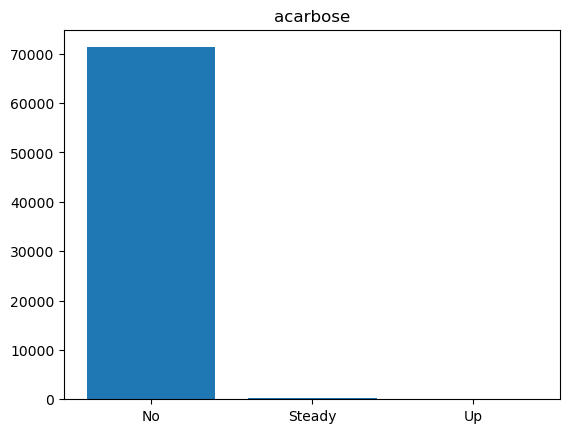

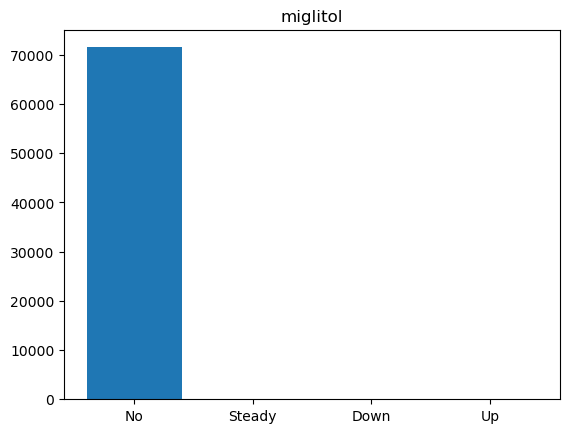

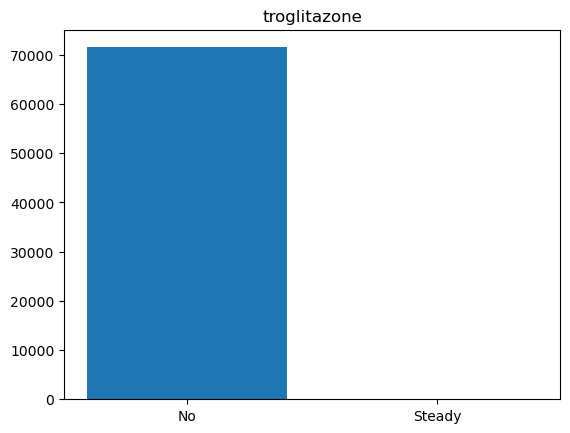

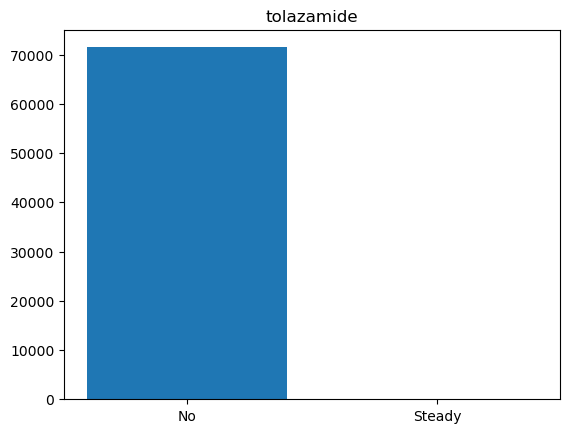

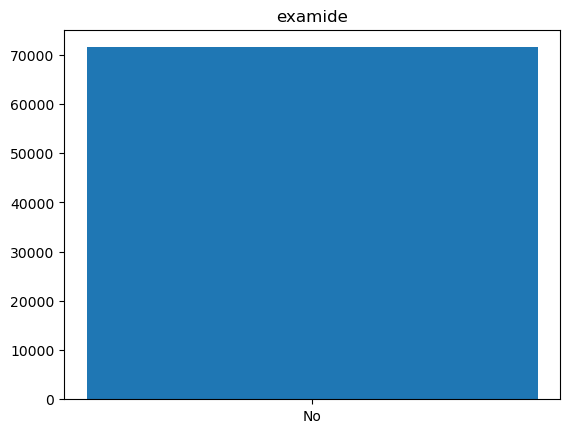

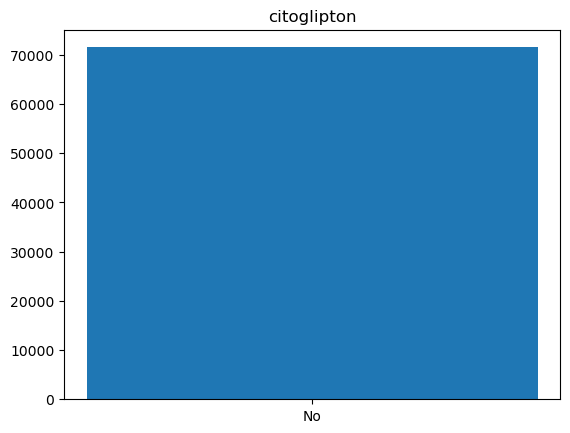

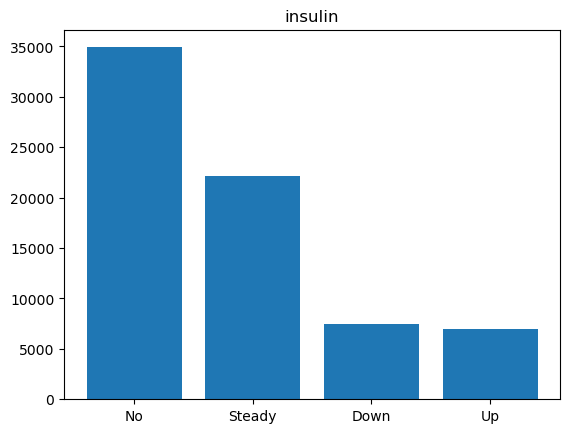

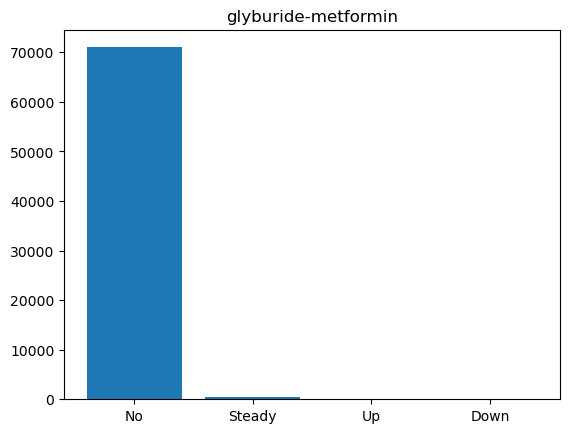

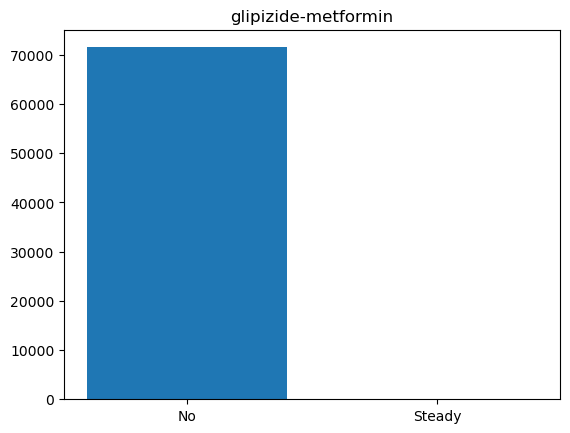

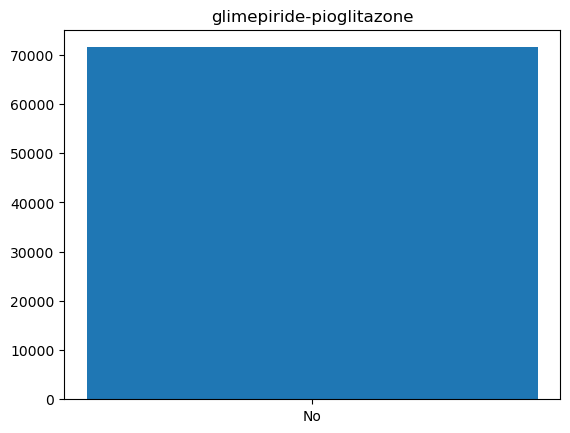

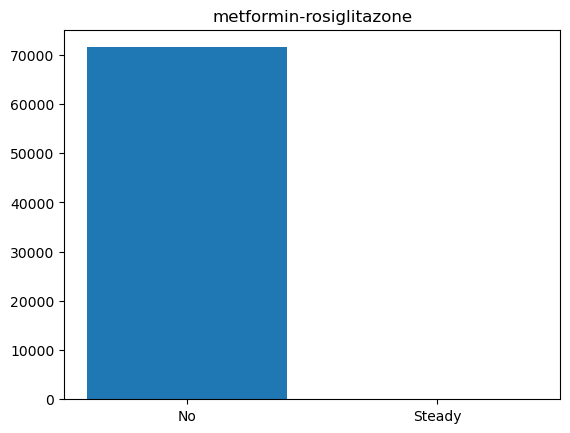

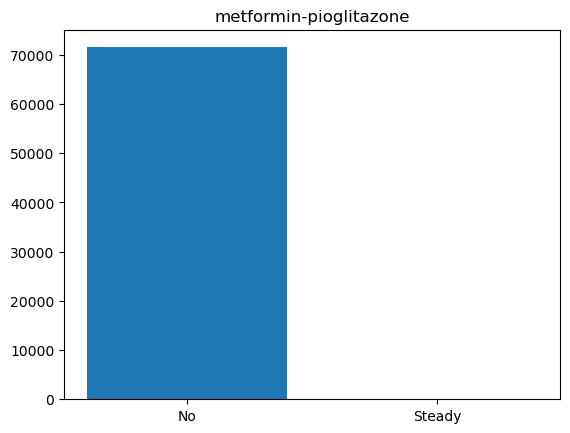

In [45]:
# Create a bar chart showing the counts of “Yes”, “No”, or “Steady” values for key medications like insulin, metformin, etc

medicine = healthcare_df[["insulin","metformin","repaglinide","nateglinide","chlorpropamide","glimepiride","acetohexamide","glipizide","glyburide","tolbutamide","pioglitazone","rosiglitazone","acarbose","miglitol","troglitazone","tolazamide","examide","citoglipton","insulin","glyburide-metformin","glipizide-metformin","glimepiride-pioglitazone","metformin-rosiglitazone","metformin-pioglitazone"]]
for x in medicine:
    plt.bar(healthcare_df[x].value_counts().index, healthcare_df[x].value_counts().values)
    plt.title(label=x)
    plt.show()

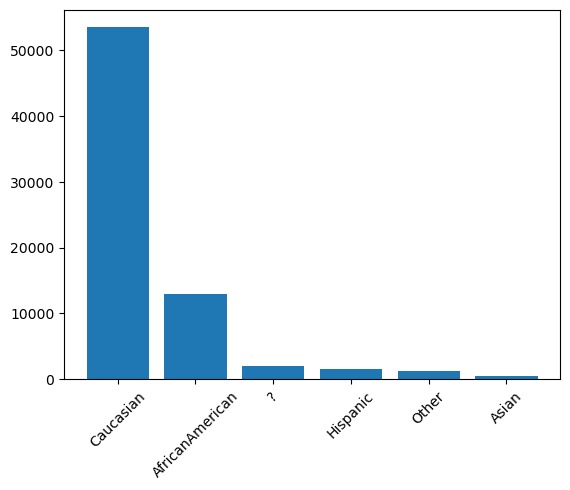

In [46]:
#Create a bar chart showing the count of patients by race
plt.bar(healthcare_df["race"].value_counts().index, healthcare_df["race"].value_counts().values,)
plt.xticks(rotation = 45)
plt.show()

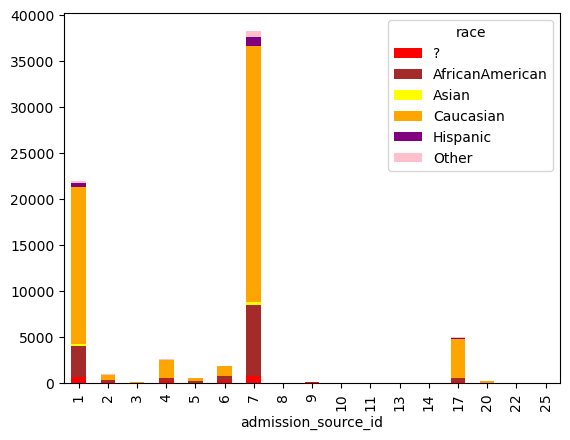

In [47]:
#Use a stacked bar chart to see which admission_source_id is common for each race
result = healthcare_df.pivot_table(index='admission_source_id', columns='race', aggfunc='size', fill_value=0)
result.plot(kind='bar', stacked=True, color= ["red","brown","yellow","orange","purple","pink"])
plt.show()

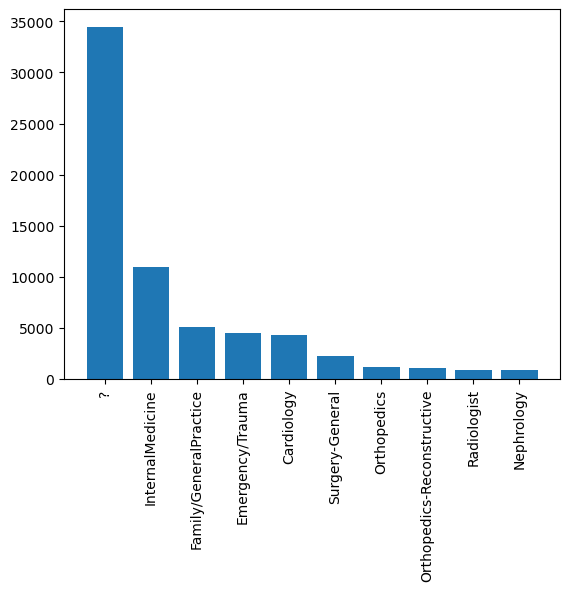

In [48]:
#Use a bar chart to show the counts of different medical_specialty values
med_speciality = (healthcare_df["medical_specialty"].value_counts()).head(10)
med_speciality.sort_values(ascending=False)
plt.bar(med_speciality.index, med_speciality.values)
plt.xticks(rotation = 90)
plt.show()

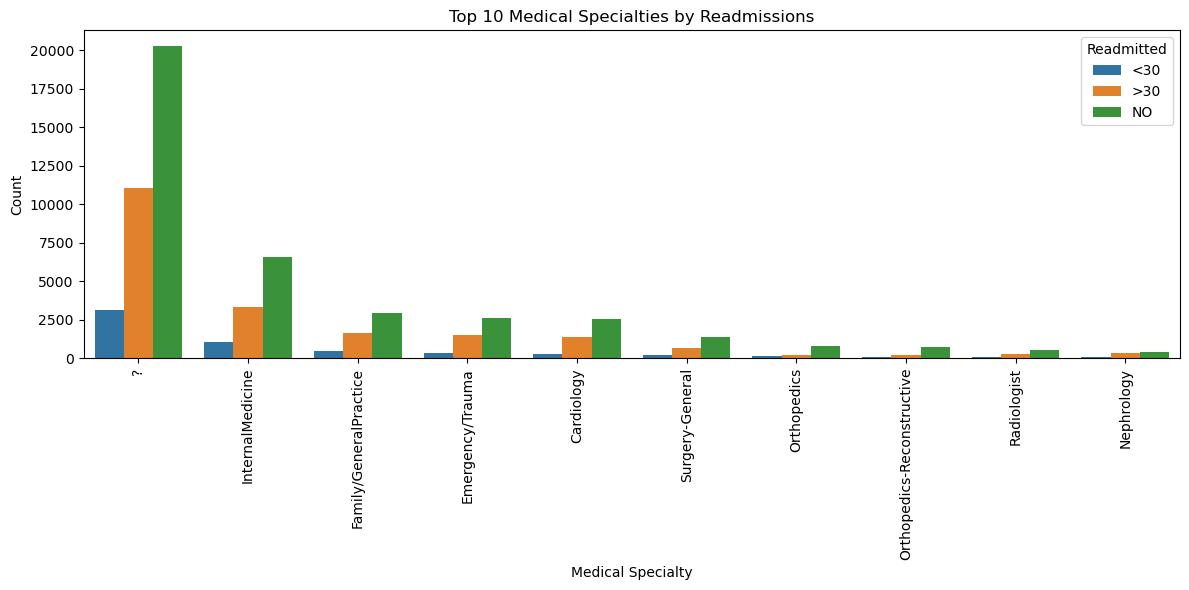

In [49]:
# Use a grouped bar chart to show readmitted status across specialties
readmitted_specialty = healthcare_df.pivot_table(index="medical_specialty", columns="readmitted", aggfunc='size', fill_value=0)

readmitted_specialty['total'] = readmitted_specialty.sum(axis=1) #axis = 1 mean that it operates along rows (horizontal direction). This sums values for each row.

# Select the top 10 specialties based on the total
top_10_specialties = readmitted_specialty.nlargest(10, 'total').drop(columns='total')

# Flatten the data for Seaborn
readmitted_specialty_flat = top_10_specialties.reset_index().melt(id_vars="medical_specialty", 
                                                                  var_name="readmitted", 
                                                                  value_name="size")

# Plot the grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=readmitted_specialty_flat, 
            x="medical_specialty", 
            y="size", 
            hue="readmitted")

# Customize the plot
plt.xticks(rotation=90)
plt.xlabel("Medical Specialty")
plt.ylabel("Count")
plt.title("Top 10 Medical Specialties by Readmissions")
plt.legend(title="Readmitted")
plt.tight_layout()

plt.show()

<Axes: xlabel='num_lab_procedures', ylabel='Count'>

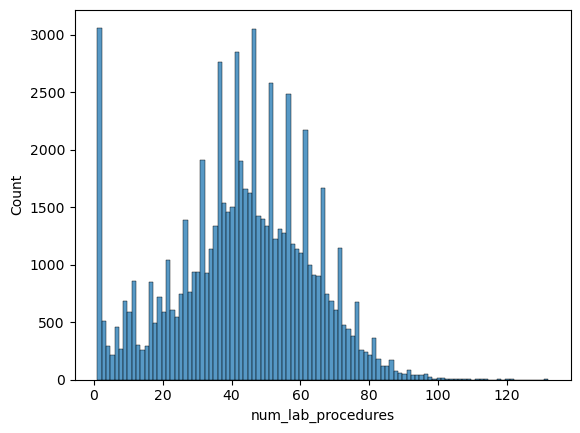

In [50]:
#Visualise distribution of a numeric column
sns.histplot(data=healthcare_df, x="num_lab_procedures")

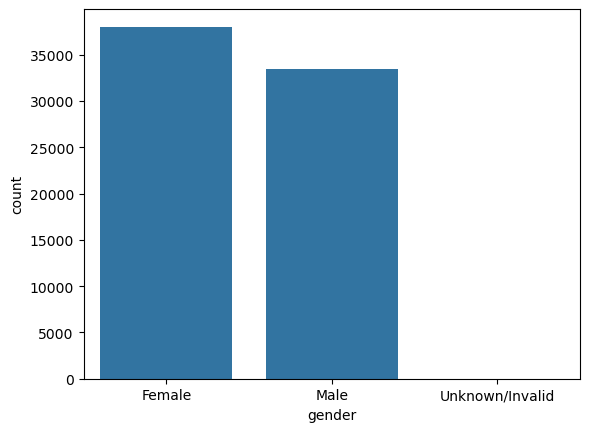

In [51]:
#Perform count plot of a categorical variable
sns.countplot(data=healthcare_df, x="gender")
plt.show()

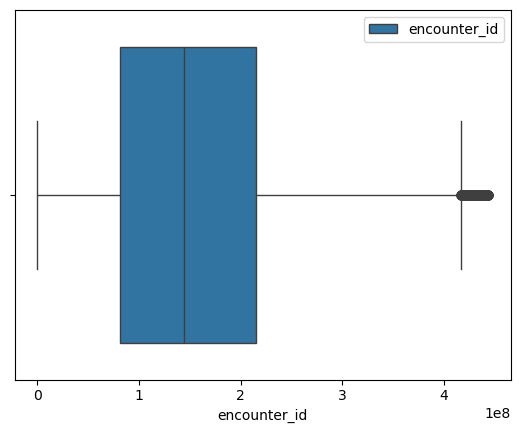

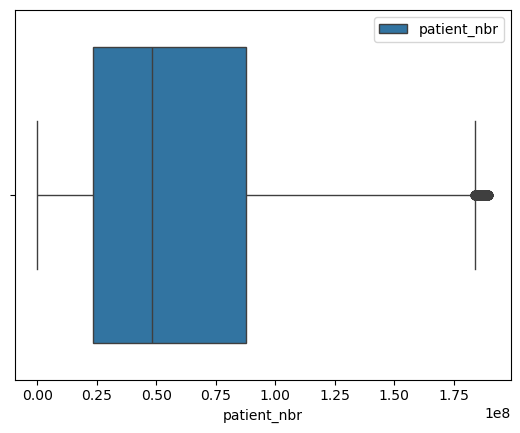

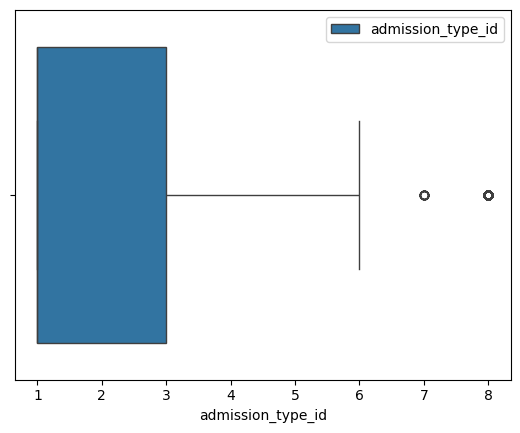

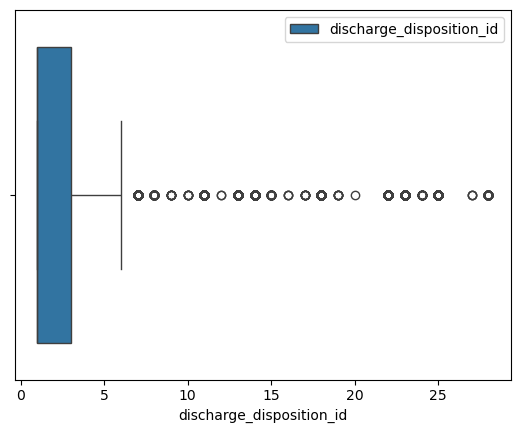

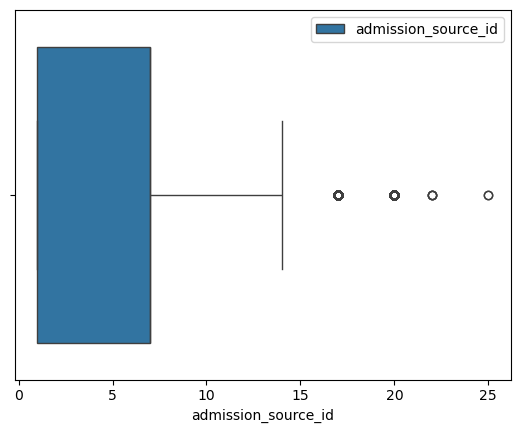

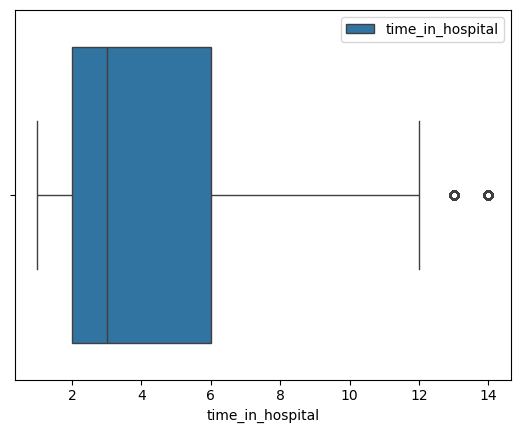

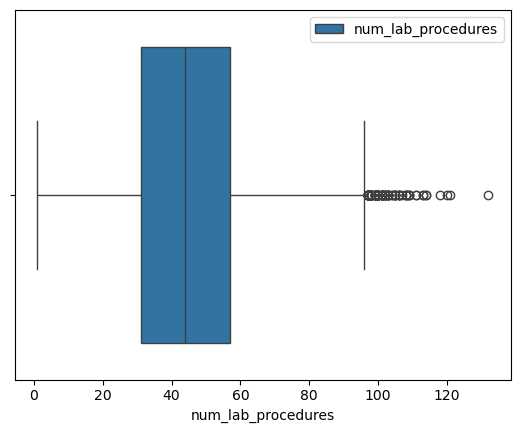

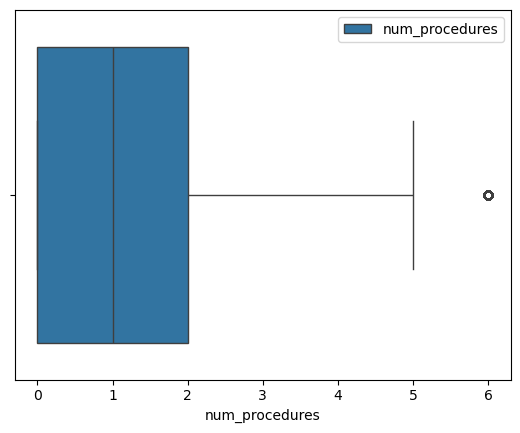

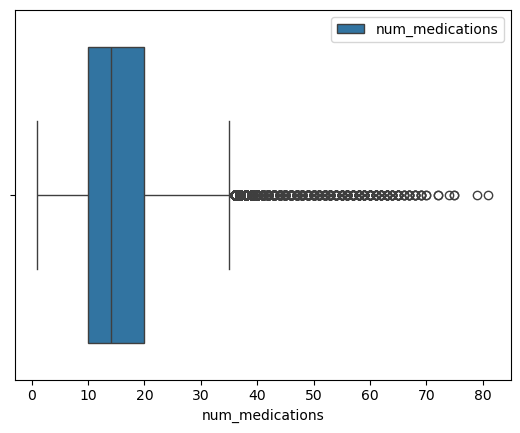

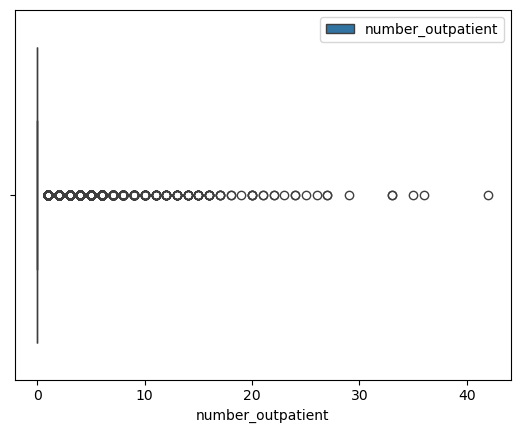

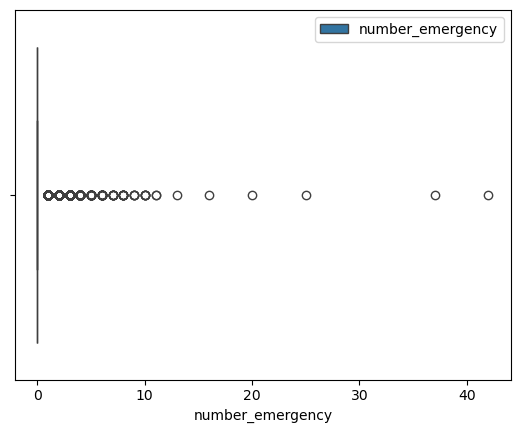

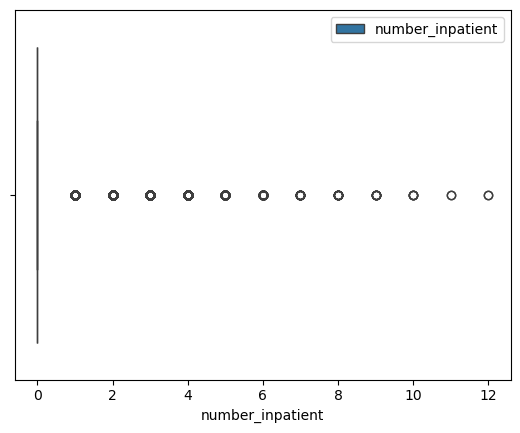

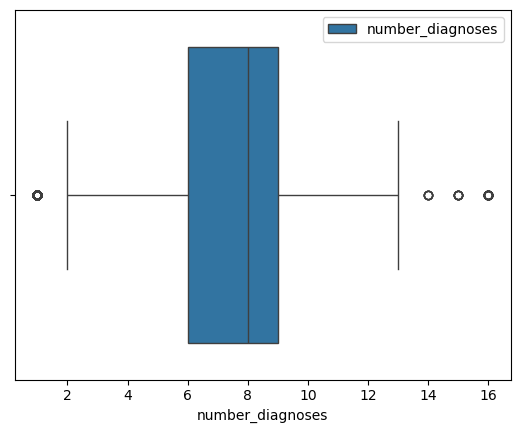

In [52]:
# Boxplot to detect outliers
for col in healthcare_df.select_dtypes(include=[np.number]):
    sns.boxplot(x=healthcare_df[col])
    plt.legend([col])
    plt.show()

In [53]:
healthcare_df['change'] = healthcare_df['change'].replace('Ch', 1)
healthcare_df['change'] = healthcare_df['change'].replace('No', 0)
healthcare_df['gender'] = healthcare_df['gender'].replace('Male', 1)
healthcare_df['gender'] = healthcare_df['gender'].replace('Female', 0)

healthcare_df['diabetesMed'] = healthcare_df['diabetesMed'].replace('Yes', 1)
healthcare_df['diabetesMed'] = healthcare_df['diabetesMed'].replace('No', 0)
healthcare_df['readmitted'] = healthcare_df['readmitted'].replace('>30', 1)
healthcare_df['readmitted'] = healthcare_df['readmitted'].replace('<30', 1)
healthcare_df['readmitted'] = healthcare_df['readmitted'].replace('NO', 0)

healthcare_df[['diag_1', 'diag_2', 'diag_3']] = healthcare_df[['diag_1', 'diag_2', 'diag_3']].apply(lambda col: col.str.replace('V', '', regex=False))
healthcare_df[['diag_1', 'diag_2', 'diag_3']] = healthcare_df[['diag_1', 'diag_2', 'diag_3']].apply(lambda col: col.str.replace('E', '', regex=False))
healthcare_df[['diag_1', 'diag_2', 'diag_3']] = healthcare_df[['diag_1', 'diag_2', 'diag_3']].apply(lambda col: col.str.replace('>', '', regex=False))

for i in range(0,10):
    healthcare_df['age'] = healthcare_df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i*10+5)

C:\Users\filip\AppData\Local\Temp\ipykernel_7844\2043996859.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  healthcare_df['change'] = healthcare_df['change'].replace('No', 0)
C:\Users\filip\AppData\Local\Temp\ipykernel_7844\2043996859.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  healthcare_df['diabetesMed'] = healthcare_df['diabetesMed'].replace('No', 0)
C:\Users\filip\AppData\Local\Temp\ipykernel_7844\2043996859.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future versio

In [54]:
healthcare_df.drop(columns = ["encounter_id", "patient_nbr", "weight", "payer_code", "medical_specialty", "race", "max_glu_serum", "A1Cresult", "metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"], inplace = True)

In [55]:
(healthcare_df == "?").sum()

gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        11
diag_2                       294
diag_3                      1225
number_diagnoses               0
change                         0
diabetesMed                    0
readmitted                     0
dtype: int64

In [56]:
healthcare_df = healthcare_df.drop(healthcare_df[(healthcare_df['diag_1'] == '?') | (healthcare_df['diag_2'] == '?') | (healthcare_df['diag_3'] == '?')].index)

healthcare_df = healthcare_df.drop(healthcare_df['gender'][healthcare_df['gender'] == 'Unknown/Invalid'].index)

In [57]:
healthcare_df["diag_1"] = healthcare_df["diag_1"].astype(float)
healthcare_df["diag_2"] = healthcare_df["diag_2"].astype(float)
healthcare_df["diag_3"] = healthcare_df["diag_3"].astype(float)
healthcare_df["gender"] = healthcare_df["gender"].astype(int)

In [58]:
healthcare_df.describe()

gender           age  admission_type_id  \
count  70230.000000  70230.000000       70230.000000   
mean       0.467706     66.028620           2.099117   
std        0.498960     15.548052           1.507895   
min        0.000000      5.000000           1.000000   
25%        0.000000     55.000000           1.000000   
50%        0.000000     65.000000           1.000000   
75%        1.000000     75.000000           3.000000   
max        1.000000     95.000000           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count              70230.000000         70230.000000      70230.000000   
mean                   3.609084             5.662794          4.317557   
std                    5.271870             4.162220          2.957419   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    3.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count        70230.000000    70230.000000     70230.000000        70230.00000   
mean            43.172220        1.444781        15.820120            0.28297   
std             19.975101        1.766203         8.301828            1.07559   
min              1.000000        0.000000         1.000000            0.00000   
25%             31.000000        0.000000        10.000000            0.00000   
50%             44.000000        1.000000        14.000000            0.00000   
75%             57.000000        2.000000        20.000000            0.00000   
max            132.000000        6.000000        81.000000           42.00000   

       number_emergency  number_inpatient        diag_1        diag_2  \
count      70230.000000      70230.000000  70230.000000  70230.000000   
mean           0.104101          0.179610    490.283122    434.726136   
std            0.510661          0.605786    209.040488    189.294769   
min            0.000000          0.000000      3.000000      2.000000   
25%            0.000000          0.000000    410.000000    276.000000   
50%            0.000000          0.000000    435.000000    424.000000   
75%            0.000000          0.000000    599.000000    518.000000   
max           42.000000         12.000000    999.000000    999.000000   

             diag_3  number_diagnoses        change   diabetesMed  \
count  70230.000000      70230.000000  70230.000000  70230.000000   
mean     407.195527          7.334572      0.448213      0.759006   
std      195.226533          1.890341      0.497314      0.427690   
min        1.000000          3.000000      0.000000      0.000000   
25%      250.600000          6.000000      0.000000      1.000000   
50%      401.000000          8.000000      0.000000      1.000000   
75%      496.000000          9.000000      1.000000      1.000000   
max      999.000000         16.000000      1.000000      1.000000   

         readmitted  
count  70230.000000  
mean       0.401381  
std        0.490181  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [59]:
def remove_outliers(data, columns):
    df = data.copy()
    
    for col in columns: 
        Q1 = df[col].quantile(0.05)
        Q3 = df[col].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
       
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df


In [60]:
outlier_cols = ["num_lab_procedures", "num_procedures", "num_medications", "number_outpatient", "number_emergency", "number_inpatient", "number_diagnoses", "time_in_hospital"]
healthcare_df = remove_outliers(healthcare_df, outlier_cols)

In [61]:
healthcare_df.describe()

gender           age  admission_type_id  \
count  68529.000000  68529.000000       68529.000000   
mean       0.468780     66.082170           2.096368   
std        0.499028     15.512467           1.502185   
min        0.000000      5.000000           1.000000   
25%        0.000000     55.000000           1.000000   
50%        0.000000     65.000000           1.000000   
75%        1.000000     75.000000           3.000000   
max        1.000000     95.000000           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count              68529.000000         68529.000000      68529.000000   
mean                   3.623853             5.650571          4.307695   
std                    5.304037             4.160681          2.952801   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    3.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count        68529.000000    68529.000000     68529.000000       68529.000000   
mean            43.045762        1.450787        15.794014           0.222650   
std             19.984836        1.770952         8.309373           0.706682   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        14.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        70.000000           5.000000   

       number_emergency  number_inpatient        diag_1        diag_2  \
count      68529.000000      68529.000000  68529.000000  68529.000000   
mean           0.075399          0.127172    490.605157    434.612603   
std            0.301405          0.392417    208.635638    189.289123   
min            0.000000          0.000000      3.000000      2.000000   
25%            0.000000          0.000000    410.000000    276.000000   
50%            0.000000          0.000000    435.000000    424.000000   
75%            0.000000          0.000000    599.000000    518.000000   
max            2.000000          2.000000    999.000000    999.000000   

             diag_3  number_diagnoses        change   diabetesMed  \
count  68529.000000      68529.000000  68529.000000  68529.000000   
mean     407.117620          7.320288      0.447373      0.757562   
std      195.451739          1.895359      0.497226      0.428561   
min        1.000000          3.000000      0.000000      0.000000   
25%      250.600000          6.000000      0.000000      1.000000   
50%      401.000000          8.000000      0.000000      1.000000   
75%      496.000000          9.000000      1.000000      1.000000   
max      999.000000         16.000000      1.000000      1.000000   

         readmitted  
count  68529.000000  
mean       0.394592  
std        0.488766  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

### Task 2.2: Identify Metadata and Missing values from the Dataset
#### 2.2.1: Identify Metadata from the Dataset
Metadata includes information like column names, data types, and any additional descriptive information.

In [62]:
# Display metadata including column names and data types
print(healthcare_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 68529 entries, 1 to 101765
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    68529 non-null  int32  
 1   age                       68529 non-null  int64  
 2   admission_type_id         68529 non-null  int64  
 3   discharge_disposition_id  68529 non-null  int64  
 4   admission_source_id       68529 non-null  int64  
 5   time_in_hospital          68529 non-null  int64  
 6   num_lab_procedures        68529 non-null  int64  
 7   num_procedures            68529 non-null  int64  
 8   num_medications           68529 non-null  int64  
 9   number_outpatient         68529 non-null  int64  
 10  number_emergency          68529 non-null  int64  
 11  number_inpatient          68529 non-null  int64  
 12  diag_1                    68529 non-null  float64
 13  diag_2                    68529 non-null  float64
 14  diag_3    


#### 2.2.2: Identify Missing Values
- Missing values can significantly impact model performance and analysis.
- Count missing values in each column.
- Calculate the percentage of missing values.

In [63]:
healthcare_df.isna().sum()

gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64

In [64]:
healthcare_df.isna().sum()

gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64

In [65]:
healthcare_df.isna().sum() / healthcare_df.shape[0] * 100

gender                      0.0
age                         0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
change                      0.0
diabetesMed                 0.0
readmitted                  0.0
dtype: float64

In [66]:
healthcare_df["age"].value_counts()

age
75    17661
65    15441
55    11997
85    11241
45     6494
35     2465
95     1862
25      971
15      333
5        64
Name: count, dtype: int64

#### 2.2.3: Splitting Data for Analysis
Splitting data ensures that models are trained on one portion of the data and tested on another, unseen portion.

In [67]:
from sklearn.model_selection import train_test_split

# Features and target
X = healthcare_df.drop(columns=['time_in_hospital'])
y = healthcare_df['time_in_hospital']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

___________
## *Task 3: Machine Learning
### Task Description
Implement various machine learning algorithms for regression, classification and clustering and evaluating them.

### **Task 3.1: Implementing a Regression Model**
#### 3.1.1: Loading the data

In [68]:
from sklearn.model_selection import train_test_split

# Features and target
X = healthcare_df.drop(columns=['time_in_hospital'])
y = healthcare_df['time_in_hospital']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3.1.2: Implement a Linear Regression Model

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge

lin_reg = Ridge()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

reg_mae = mean_absolute_error(y_test, y_pred)
reg_mse = mean_squared_error(y_test, y_pred)

print("Linear Regression Results:")
print(f"Mean Absolute Error (MAE): {reg_mae}")
print(f"Mean Squared Error (MSE): {reg_mse}")

Linear Regression Results:
Mean Absolute Error (MAE): 1.8618661723728527
Mean Squared Error (MSE): 5.996176941410482


##### You could try other linear models as well, such as Ridge, Lasso, useful information can be found [here](https://scikit-learn.org/stable/modules/linear_model.html#linear-model).

#### 3.1.3: Visualise the output for linear regression

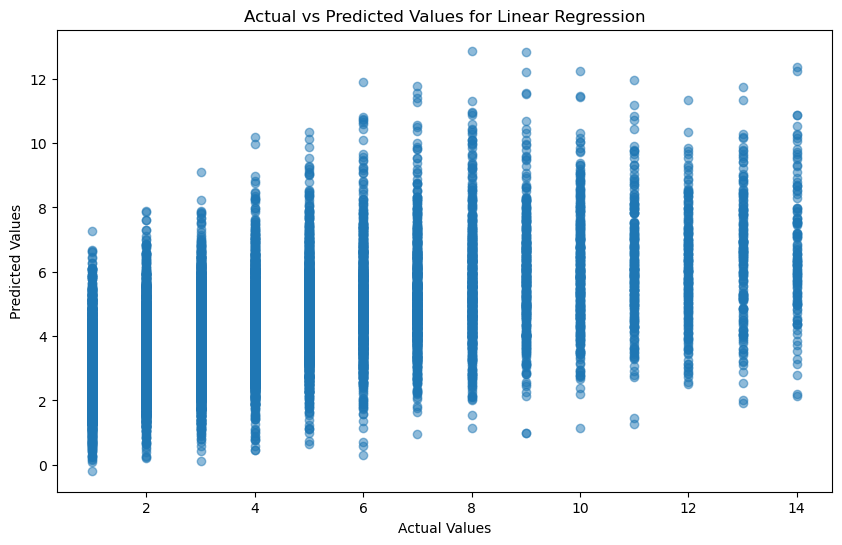

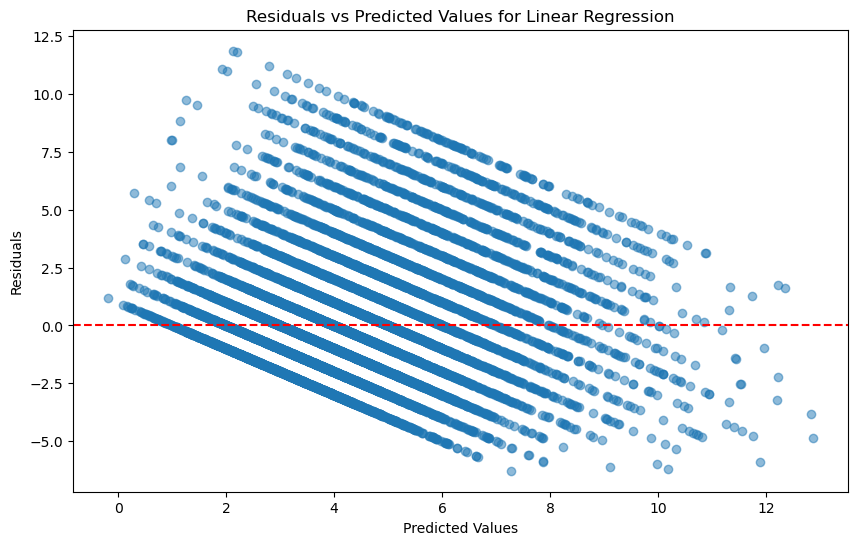

In [70]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Linear Regression')
plt.show()

# Plotting the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values for Linear Regression')
plt.show()

#### 3.1.4: Implement a Decision Tree Regression for Non-linear Relationships

In [71]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=9, random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

dec_mae = mean_absolute_error(y_test, y_pred)
dec_mse = mean_squared_error(y_test, y_pred)

print("Decision Tree Regressor Results:")
print(f"Mean Absolute Error (MAE): {dec_mae}")
print(f"Mean Squared Error (MSE): {dec_mse}")

Decision Tree Regressor Results:
Mean Absolute Error (MAE): 1.7412474188112939
Mean Squared Error (MSE): 5.511803003661744


#### 3.1.5: Implement a Gradient Boosting Regression

In [72]:
from sklearn.ensemble import GradientBoostingRegressor

gboost_model = GradientBoostingRegressor()
gboost_model.fit(X_train, y_train)

y_pred_gboost = gboost_model.predict(X_test)

mae_gboost = mean_absolute_error(y_test, y_pred_gboost)
mse_gboost = mean_squared_error(y_test, y_pred_gboost)

print(f"Gradient Boosting Regression MAE: {mae_gboost}")
print(f"Gradient Boosting Regression MSE: {mse_gboost}")

Gradient Boosting Regression MAE: 1.6636085758288037
Gradient Boosting Regression MSE: 4.938054625464584


#### 3.1.6: Implement XGBoost Regression

In [73]:
import xgboost
from xgboost import XGBRegressor

xgboost_model = XGBRegressor()
xgboost_model.fit(X_train, y_train)

y_pred_xgboost = xgboost_model.predict(X_test)

mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)

print(f"XGBoost Regression MAE: {mae_xgboost}")
print(f"XGBoost Regression MSE: {mse_xgboost}")

XGBoost Regression MAE: 1.5900664776687994
XGBoost Regression MSE: 4.609218321896212


#### 3.1.7: Visualise the output for non-linear regression models
Try to plot histogram of features, useful information can be found [here](https://matplotlib.org/stable/gallery/statistics/hist.html)

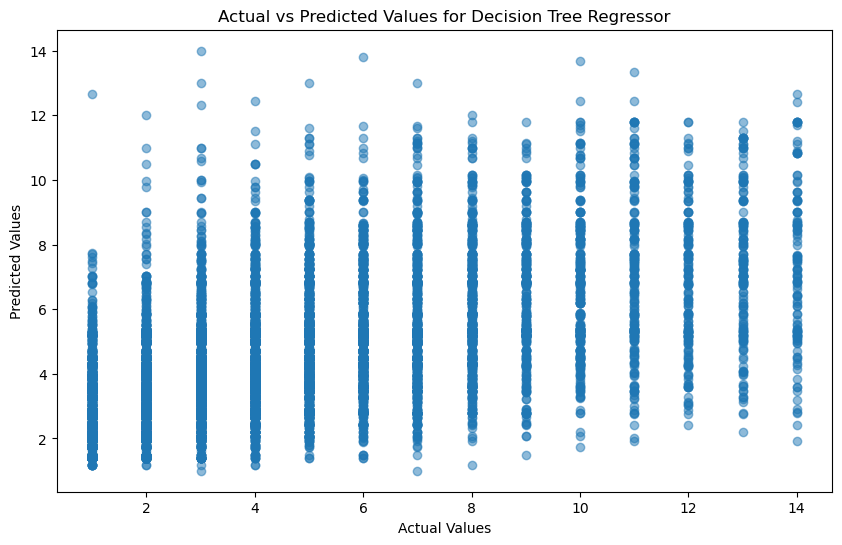

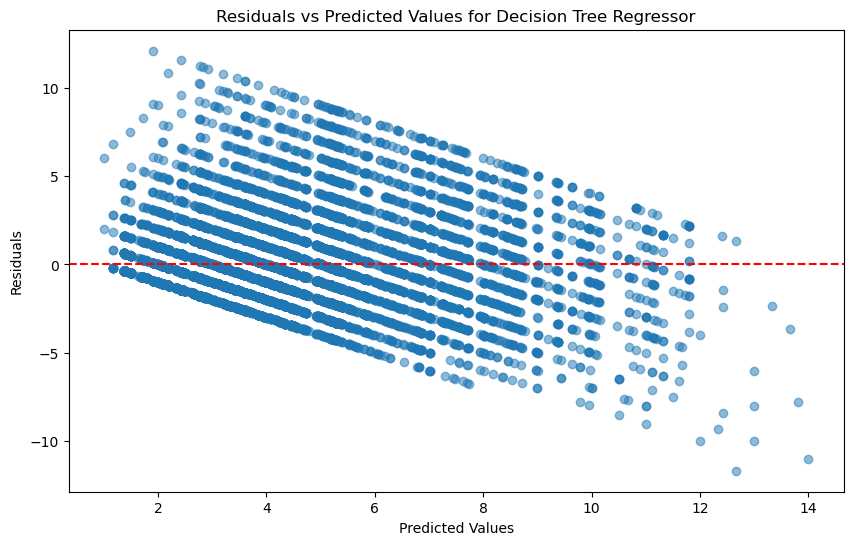

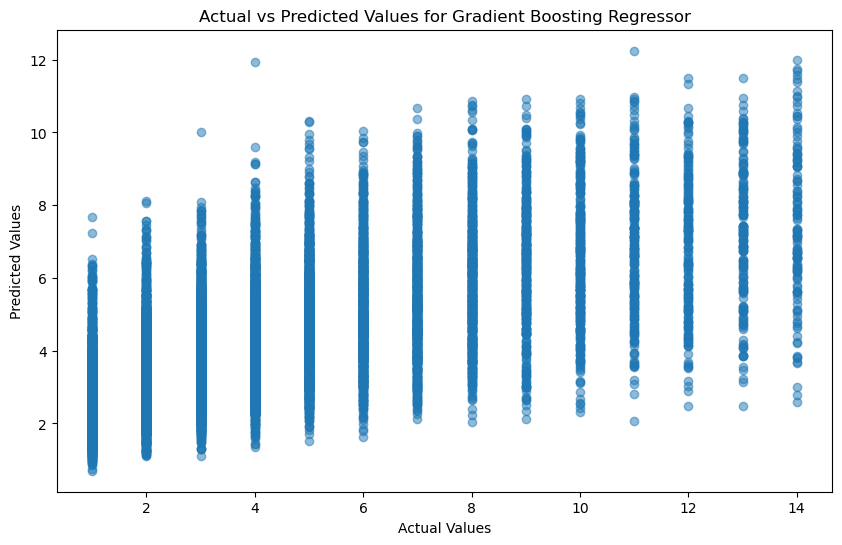

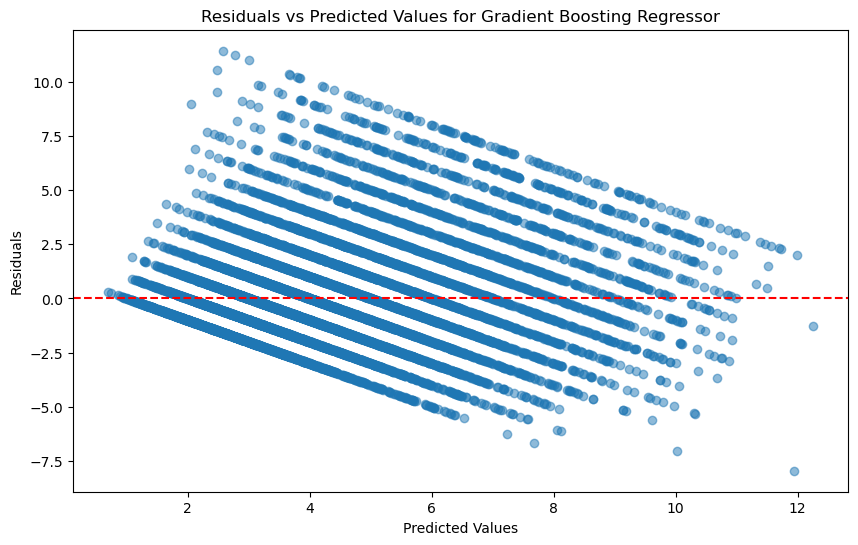

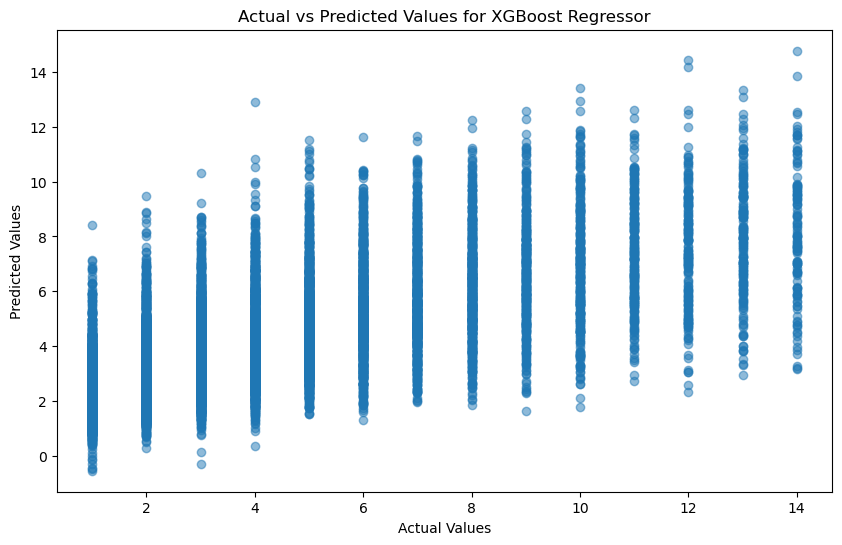

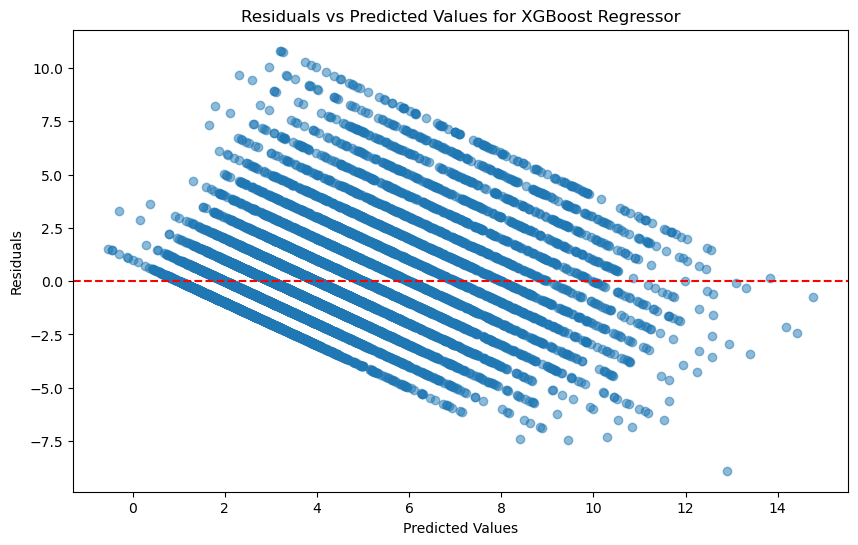

In [74]:
# Decision Tree Regressor
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, tree.predict(X_test), alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Decision Tree Regressor')
plt.show()

# Plotting the residuals
residuals_tree = y_test - tree.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(tree.predict(X_test), residuals_tree, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values for Decision Tree Regressor')
plt.show()

# Gradient Boosting Regressor
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gboost_model.predict(X_test), alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Gradient Boosting Regressor')
plt.show()

# Plotting the residuals
residuals_gboost = y_test - gboost_model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(gboost_model.predict(X_test), residuals_gboost, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values for Gradient Boosting Regressor')
plt.show()

# XGBoost Regressor
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgboost, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for XGBoost Regressor')
plt.show()

# Plotting the residuals
residuals_xgboost = y_test - y_pred_xgboost
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgboost, residuals_xgboost, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values for XGBoost Regressor')
plt.show()

#### 3.1.8: Evaluation and compare the performance of the models
compare the performance of all four models: Linear Regression, Decision Tree Regression, Gradient Boosting, and XGBoost. Summarise each model’s performance using a comparison table.


In [75]:
# Sample comparison table
results = {
    "Model": ["Linear Regression", "Decision Tree", "Gradient Boosting", "XGBoost"],
    "MAE": [reg_mae,dec_mae, mae_gboost, mae_xgboost],
    "MSE": [reg_mse,dec_mse, mse_gboost, mse_xgboost]
}
results_df = pd.DataFrame(results)
results_df.set_index(keys="Model")

MAE       MSE
Model                                
Linear Regression  1.861866  5.996177
Decision Tree      1.741247  5.511803
Gradient Boosting  1.663609  4.938055
XGBoost            1.590066  4.609218

#### Expected Output for model comparison in 3.1.8:

| Model | MAE | MSE |
|---|---|---|
| Linear Regression | -- | -- |
| Decision Tree     | -- | -- |
| Gradient Boosting | -- | -- |
| XGBoost           | -- | -- |

++++++++
### **3.2: Implementing Classification Baseline**


#### 3.2.1: Loading the data

In [76]:
healthcare_df_classification = healthcare_df.copy()

#### 3.2.2:  Prepare Data for Classification


In [77]:
from sklearn.model_selection import train_test_split

# Defining target and features 
X = healthcare_df_classification.drop(columns=['readmitted'])
y = healthcare_df_classification['readmitted']

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3.2.3:  Implement Logistic Regression Model

In [78]:
 #<add your code here>
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logistic_model = LogisticRegression(max_iter=5000)

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

log_reg_accuracy = accuracy_score(y_test, y_pred)
log_reg_f1 = f1_score(y_test, y_pred)
log_reg_precision = precision_score(y_test, y_pred)
log_reg_recall = recall_score(y_test, y_pred)

print(f"Accuracy: {log_reg_accuracy}\nF1 Score: {log_reg_f1}\nPrecision: {log_reg_precision}\nRecall: {log_reg_recall}")

Accuracy: 0.6210418794688458
F1 Score: 0.2659694742792538
Precision: 0.573780487804878
Recall: 0.17310522442972773


#### 3.2.4: Implement a Random Forest Classifier as a Non-linear Baseline

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rfc = rf_model.predict(X_test)

rfc_accuracy = accuracy_score(y_test, y_pred_rfc)
rfc_f1 = f1_score(y_test, y_pred_rfc)
rfc_precision = precision_score(y_test, y_pred_rfc)
rfc_recall = recall_score(y_test, y_pred_rfc)

print(f"Accuracy: {rfc_accuracy}\nF1 Score: {rfc_f1}\nPrecision: {rfc_precision}\nRecall: {rfc_recall}")

Accuracy: 0.6284109149277689
F1 Score: 0.3949150528691933
Precision: 0.5575310298557531
Recall: 0.3057395143487859


#### 3.2.5: Implement a K-Nearest Neighbors (KNN) Classifier

In [80]:
 #<add your code here>
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)

print(f"Accuracy: {knn_accuracy}\nF1 Score: {knn_f1}\nPrecision: {knn_precision}\nRecall: {knn_recall}")

Accuracy: 0.5797460966000292
F1 Score: 0.28500496524329694
Precision: 0.4381679389312977
Recall: 0.21118469462840322


#### 3.2.6: Evaluation and Model Comparison
Compare the performance of implemented models using four metrics including "Accuracy", "Precision", "Recall", and "F1-score".

In [81]:
results = {
    "Model": ["Logistic Regression", "Random Forest", "K-Nearest Neighbors"],
    "Accuracy":[log_reg_accuracy, rfc_accuracy, knn_accuracy],
    "Precision":[log_reg_precision, rfc_precision, knn_precision],
    "Recall":[log_reg_recall, rfc_recall, knn_recall],
    "F1-score":[log_reg_f1, rfc_f1, knn_f1]
}

results_df = pd.DataFrame(results)
results_df.set_index(keys="Model")

Accuracy  Precision    Recall  F1-score
Model                                                       
Logistic Regression  0.621042   0.573780  0.173105  0.265969
Random Forest        0.628411   0.557531  0.305740  0.394915
K-Nearest Neighbors  0.579746   0.438168  0.211185  0.285005

#### Expected Output for Model Comparison in 3.2.6:
| Model | Accuracy | Precision | Recall | F1-score |
|---|---|---|---|---|
| Logistic Regression | -- | -- | -- | -- |
| Random Forest       | -- | -- | -- | -- |
| K-Nearest Neighbors | -- | -- | -- | -- |

++++++++
### **Task 3.3: Implementing a Clustering Model**


#### 3.3.1: Load and Preprocess the Data (Already done in previous tasks)

In [82]:
 #<add your code here>
from sklearn.preprocessing import StandardScaler
healthcare_df_clustering = healthcare_df.copy()

scaler = StandardScaler()
healthcare_df_clustering_scaled = scaler.fit_transform(healthcare_df_clustering)


#### 3.3.2: Implement K-Means Clustering

In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
y_pred_kmeans = kmeans.fit_predict(healthcare_df_clustering_scaled)
kmeans_score = silhouette_score(healthcare_df_clustering_scaled, y_pred_kmeans)

print(f"Silhouette Score: {kmeans_score}")

Silhouette Score: 0.08014913897496984


#### 3.3.3: Apply PCA for Dimensionality Reduction

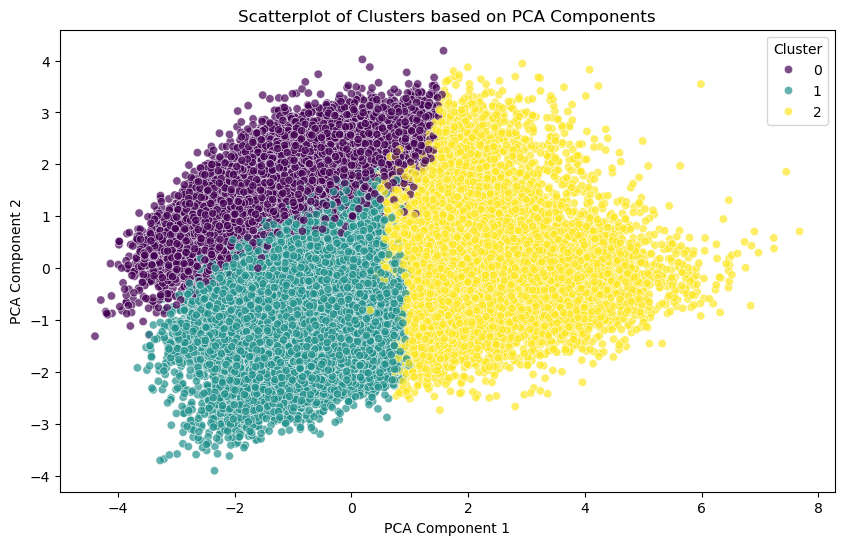

In [84]:
import seaborn as sns
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# Perform PCA to reduce the dimensionality to 2 components for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(healthcare_df_clustering_scaled)

# Create a DataFrame with the PCA components and the cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = y_pred_kmeans

# Plot the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=pca_df, alpha=0.7)
plt.title('Scatterplot of Clusters based on PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

#### 3.3.4: Implement Random Hierarchical Clustering

Silhouette Score: 0.41818356580056604


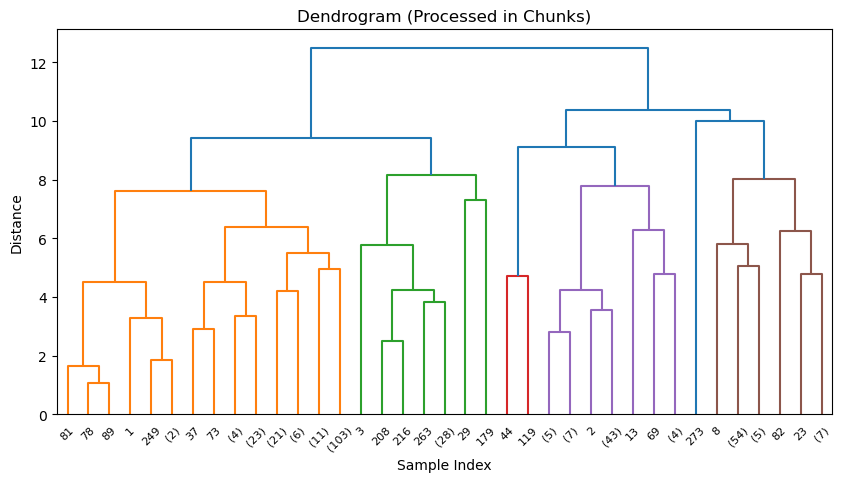

In [85]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

def hierarchical_clustering_in_chunks(scaled_data, chunk_size=1000, method='complete', metric='euclidean'):
    n_samples = scaled_data.shape[0]
    chunk_indices = np.arange(0, n_samples, chunk_size)
    cluster_centroids = []

    # Process data in chunks
    for i, start_idx in enumerate(chunk_indices):
        end_idx = min(start_idx + chunk_size, n_samples)
        chunk = scaled_data[start_idx:end_idx]

        # Perform clustering on the chunk
        if chunk.shape[0] > 1:  # Ensure chunk has more than 1 sample
            linkage_data = linkage(chunk, method=method, metric=metric)
            dendrogram(linkage_data, no_plot=True)  # No need to plot interim dendrogram
            # Approximate centroids by averaging cluster data
            labels = AgglomerativeClustering(n_clusters=min(5, chunk.shape[0]), linkage=method).fit(chunk).labels_
            centroids = np.array([chunk[labels == c].mean(axis=0) for c in np.unique(labels)])
            cluster_centroids.append(centroids)

    # Combine centroids from all chunks
    cluster_centroids = np.vstack(cluster_centroids)

    # Perform hierarchical clustering on the combined centroids
    final_linkage_data = linkage(cluster_centroids, method=method, metric=metric)
    final_labels = AgglomerativeClustering(n_clusters=3, linkage=method).fit_predict(cluster_centroids)

    # Calculate silhouette score
    agglo_score = silhouette_score(cluster_centroids, final_labels)
    print(f"Silhouette Score: {agglo_score}")
    
    # Plot the final dendrogram
    plt.figure(figsize=(10, 5))
    dendrogram(final_linkage_data, truncate_mode='level', p=5)
    plt.title("Dendrogram (Processed in Chunks)")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()
    
    return agglo_score

# Example usage
agglo_score = hierarchical_clustering_in_chunks(healthcare_df_clustering_scaled, chunk_size=1000)

#### 3.3.5: Implement DBSCAN for Density-Based Clustering

In [86]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

dbscan = DBSCAN(eps=4, min_samples=6)
y_pred_dbscan = dbscan.fit(healthcare_df_clustering_scaled)

# Calculate the silhouette score
dbscan_score = silhouette_score(healthcare_df_clustering_scaled, y_pred_dbscan.labels_)
print(f"Silhouette Score: {dbscan_score}")

Silhouette Score: 0.34831737020405273


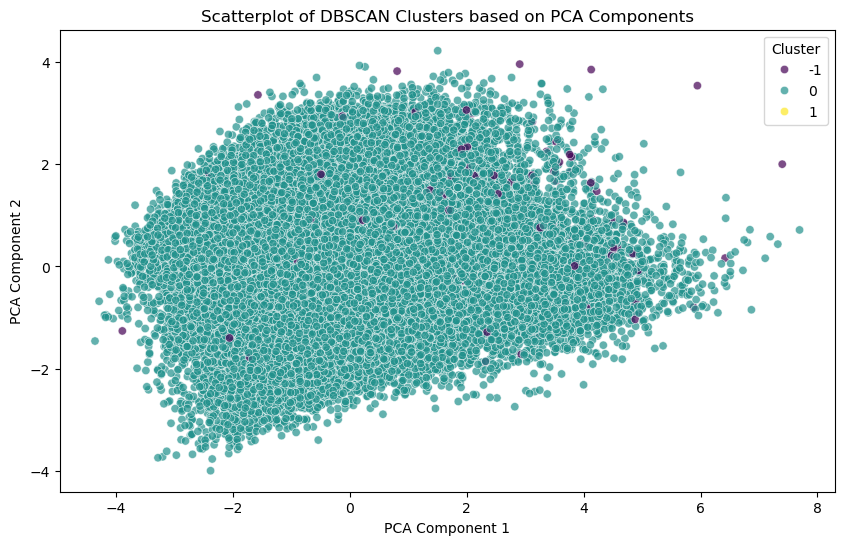

In [87]:
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce the dimensionality to 2 components for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(healthcare_df_clustering_scaled)

# Create a DataFrame with the PCA components and the cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = dbscan.labels_

# Plot the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=pca_df, alpha=0.7)
plt.title('Scatterplot of DBSCAN Clusters based on PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

#### 3.3.6: Evaluation and Model Comparison

In [28]:
# Summary of Silhouette Scores
results = {
    "Clustering Method": ["K-Means", "Hierarchical", "DBSCAN"],
    "Silhouette Score": [kmeans_score, agglo_score , dbscan_score]
}

results_df = pd.DataFrame(results)
results_df

Clustering Method  Silhouette Score
0           K-Means          0.100670
1      Hierarchical          0.398958
2            DBSCAN          0.419849

#### Expected Output for Model Comparison in 3.3.6:
| Clustering Method | Silhouette Score |
|     ---           |    --   |
| K-Means           |  |
| Hierarchical      |  |
| DBSCAN            |  |

++++++++++
### **3.4 Feature Engineering and Feature Selection**
Select the most relevant features to improve implemented models performance

#### 3.4.1: Feature Engineering

In [61]:
healthcare_df["admission_type_id"] = healthcare_df["admission_type_id"].replace([5,6,8], np.nan)

healthcare_df["discharge_disposition_id"] = healthcare_df["discharge_disposition_id"].replace([18,25,26], np.nan)

healthcare_df["admission_source_id"] = healthcare_df["admission_source_id"].replace([9,15,17,20,21], np.nan)

In [62]:
healthcare_df.isna().sum()

gender                         0
age                            0
admission_type_id           7627
discharge_disposition_id    3172
admission_source_id         4958
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                         0
diag_2                         0
diag_3                         0
number_diagnoses               0
change                         0
diabetesMed                    0
readmitted                     0
dtype: int64

In [63]:
healthcare_df.dropna(inplace = True)

In [64]:
healthcare_df['admission_type_id'] = healthcare_df['admission_type_id'].replace(2,1)
healthcare_df['admission_type_id'] = healthcare_df['admission_type_id'].replace(7,1)
healthcare_df['admission_type_id'] = healthcare_df['admission_type_id'].replace(6,5)
healthcare_df['admission_type_id'] = healthcare_df['admission_type_id'].replace(8,5)

healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(6,1)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(8,1)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(9,1)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(13,1)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(3,2)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(4,2)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(5,2)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(14,2)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(22,2)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(23,2)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(24,2)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(12,10)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(15,10)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(16,10)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(17,10)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(25,18)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(26,18)
healthcare_df
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(2,1)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(3,1)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(5,4)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(6,4)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(10,4)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(22,4)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(25,4)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(15,9)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(17,9)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(20,9)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(21,9)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(13,11)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(14,11)

In [65]:
healthcare_df[["admission_source_id","admission_type_id","discharge_disposition_id","gender"]] = healthcare_df[["admission_source_id","admission_type_id","discharge_disposition_id","gender"]].astype(int)

In [66]:
healthcare_df['diag_1'] = healthcare_df['diag_1'].astype(float)
healthcare_df['diag_2'] = healthcare_df['diag_2'].astype(float)
healthcare_df['diag_3'] = healthcare_df['diag_3'].astype(float)

In [67]:
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=1) & (healthcare_df['diag_1']< 140)] = 1
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=140) & (healthcare_df['diag_1']< 240)] = 2
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=240) & (healthcare_df['diag_1']< 280)] = 3
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=280) & (healthcare_df['diag_1']< 290)] = 4
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=290) & (healthcare_df['diag_1']< 320)] = 5
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=320) & (healthcare_df['diag_1']< 390)] = 6
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=390) & (healthcare_df['diag_1']< 460)] = 7
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=460) & (healthcare_df['diag_1']< 520)] = 8
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=520) & (healthcare_df['diag_1']< 580)] = 9
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=580) & (healthcare_df['diag_1']< 630)] = 10
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=630) & (healthcare_df['diag_1']< 680)] = 11
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=680) & (healthcare_df['diag_1']< 710)] = 12
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=710) & (healthcare_df['diag_1']< 740)] = 13
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=740) & (healthcare_df['diag_1']< 760)] = 14
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=760) & (healthcare_df['diag_1']< 780)] = 15
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=780) & (healthcare_df['diag_1']< 800)] = 16
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=800) & (healthcare_df['diag_1']< 1000)] = 17
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']==-1)] = 0
healthcare_df
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=1) & (healthcare_df['diag_2']< 140)] = 1
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=140) & (healthcare_df['diag_2']< 240)] = 2
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=240) & (healthcare_df['diag_2']< 280)] = 3
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=280) & (healthcare_df['diag_2']< 290)] = 4
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=290) & (healthcare_df['diag_2']< 320)] = 5
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=320) & (healthcare_df['diag_2']< 390)] = 6
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=390) & (healthcare_df['diag_2']< 460)] = 7
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=460) & (healthcare_df['diag_2']< 520)] = 8
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=520) & (healthcare_df['diag_2']< 580)] = 9
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=580) & (healthcare_df['diag_2']< 630)] = 10
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=630) & (healthcare_df['diag_2']< 680)] = 11
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=680) & (healthcare_df['diag_2']< 710)] = 12
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=710) & (healthcare_df['diag_2']< 740)] = 13
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=740) & (healthcare_df['diag_2']< 760)] = 14
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=760) & (healthcare_df['diag_2']< 780)] = 15
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=780) & (healthcare_df['diag_2']< 800)] = 16
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=800) & (healthcare_df['diag_2']< 1000)] = 17
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']==-1)] = 0
healthcare_df
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=1) & (healthcare_df['diag_3']< 140)] = 1
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=140) & (healthcare_df['diag_3']< 240)] = 2
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=240) & (healthcare_df['diag_3']< 280)] = 3
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=280) & (healthcare_df['diag_3']< 290)] = 4
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=290) & (healthcare_df['diag_3']< 320)] = 5
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=320) & (healthcare_df['diag_3']< 390)] = 6
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=390) & (healthcare_df['diag_3']< 460)] = 7
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=460) & (healthcare_df['diag_3']< 520)] = 8
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=520) & (healthcare_df['diag_3']< 580)] = 9
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=580) & (healthcare_df['diag_3']< 630)] = 10
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=630) & (healthcare_df['diag_3']< 680)] = 11
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=680) & (healthcare_df['diag_3']< 710)] = 12
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=710) & (healthcare_df['diag_3']< 740)] = 13
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=740) & (healthcare_df['diag_3']< 760)] = 14
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=760) & (healthcare_df['diag_3']< 780)] = 15
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=780) & (healthcare_df['diag_3']< 800)] = 16
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=800) & (healthcare_df['diag_3']< 1000)] = 17
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']==-1)] = 0

C:\Users\filip\AppData\Local\Temp\ipykernel_35776\955466278.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=1) & (healthcare_df['diag_1']< 140)] = 1
C:\Users\filip\AppData\Local\Temp\

#### 3.4.2: Generate Statistical Features
Calculate aggregate statistics such as mean, max, min, or standard deviation for features if relevant

In [68]:
#<add your code here>

#### 3.4.3: Feature Transformation
Normalise or standardise features, especially for distance-based models like KNN or clustering

In [69]:
#<add your code here>

#### 3.4.4: Feature Selection
Use feature importance from tree-based models (Random Forest, Gradient Boosting) to select important features


In [70]:
from sklearn.model_selection import train_test_split

X = healthcare_df.drop(columns=['readmitted'])
y = healthcare_df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

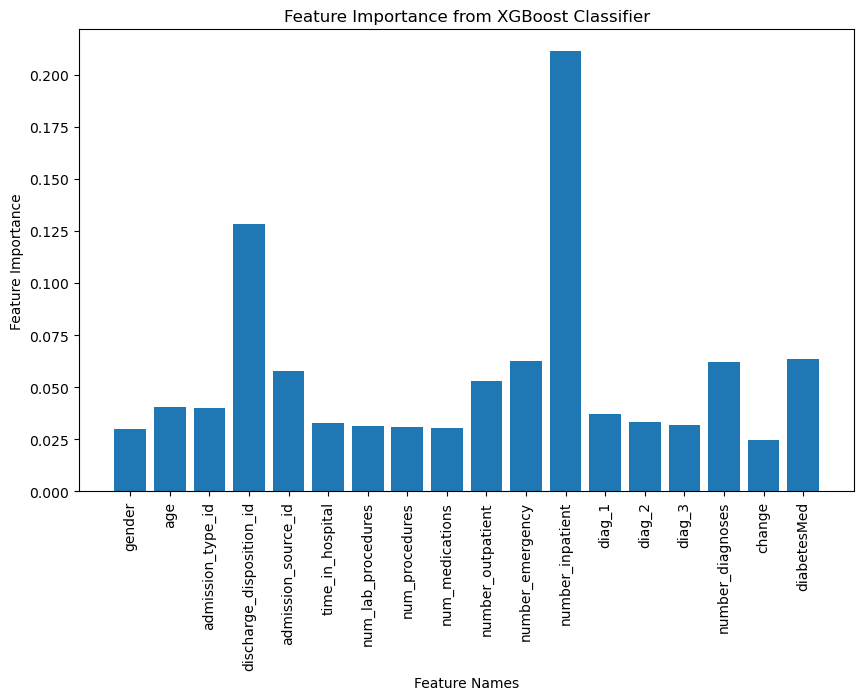

In [71]:
from xgboost import XGBClassifier

xgb_model_feature = XGBClassifier()

xgb_model_feature.fit(X_train, y_train)

feature_importances = xgb_model_feature.feature_importances_

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)), X.columns, rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importance from XGBoost Classifier')
plt.show()

#### 3.4.5: Model Evaluation After Feature Selection
- After feature engineering and selection, evaluate your model with the new set of features.
- Apply cross-validation to measure the model’s performance with the refined feature set

In [72]:
important_features = [col for col, importance in zip(X.columns, feature_importances) if importance > 0.05]
print(important_features)

important_features.append('readmitted')

healthcare_df_important_feature = healthcare_df[important_features]

healthcare_df_important_feature

['discharge_disposition_id', 'admission_source_id', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'diabetesMed']


discharge_disposition_id  admission_source_id  number_outpatient  \
1                              1                    7                  0   
2                              1                    7                  2   
3                              1                    7                  0   
4                              1                    7                  0   
5                              1                    1                  0   
...                          ...                  ...                ...   
101754                         1                    7                  0   
101755                         1                    7                  0   
101756                         1                    7                  1   
101758                         1                    7                  0   
101765                         1                    7                  0   

        number_emergency  number_inpatient  number_diagnoses  diabetesMed  \
1                      0                 0                 9            1   
2                      0                 1                 6            1   
3                      0                 0                 7            1   
4                      0                 0                 5            1   
5                      0                 0                 9            1   
...                  ...               ...               ...          ...   
101754                 0                 0                 9            1   
101755                 1                 0                 9            1   
101756                 1                 1                 9            1   
101758                 1                 0                 9            1   
101765                 0                 0                 9            0   

        readmitted  
1                1  
2                0  
3                0  
4                0  
5                1  
...            ...  
101754           1  
101755           1  
101756           1  
101758           0  
101765           0  

[57688 rows x 8 columns]

In [73]:
from sklearn.model_selection import train_test_split

X = healthcare_df_important_feature.drop(columns=['readmitted'])
y = healthcare_df_important_feature['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

scores = cross_val_score(rf_model, X, y, cv=3, scoring='recall')

y_pred_rfc = rf_model.predict(X_test)

rfc_accuracy = accuracy_score(y_test, y_pred_rfc)
rfc_f1 = f1_score(y_test, y_pred_rfc)
rfc_precision = precision_score(y_test, y_pred_rfc)
rfc_recall = recall_score(y_test, y_pred_rfc)

print(f"avg_recall = {scores.mean()}")

print(f"Accuracy: {rfc_accuracy}\nF1 Score: {rfc_f1}\nPrecision: {rfc_precision}\nRecall: {rfc_recall}")

avg_recall = 0.20131966557290096
Accuracy: 0.6227249089963599
F1 Score: 0.3022920339798045
Precision: 0.5354911981828506
Recall: 0.2105850826261724


In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
healthcare_df_important_feature_scaled = scaler.fit_transform(healthcare_df_important_feature)


In [76]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

dbscan = DBSCAN(eps=4, min_samples=6)
y_pred_dbscan = dbscan.fit(healthcare_df_important_feature_scaled)

# Calculate the silhouette score
dbscan_score = silhouette_score(healthcare_df_important_feature_scaled, y_pred_dbscan.labels_)
print(f"Silhouette Score: {dbscan_score}")

Silhouette Score: 0.6749914052062312


In [77]:
from sklearn.model_selection import train_test_split

X = healthcare_df.drop(columns=['time_in_hospital'])
y = healthcare_df['time_in_hospital']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

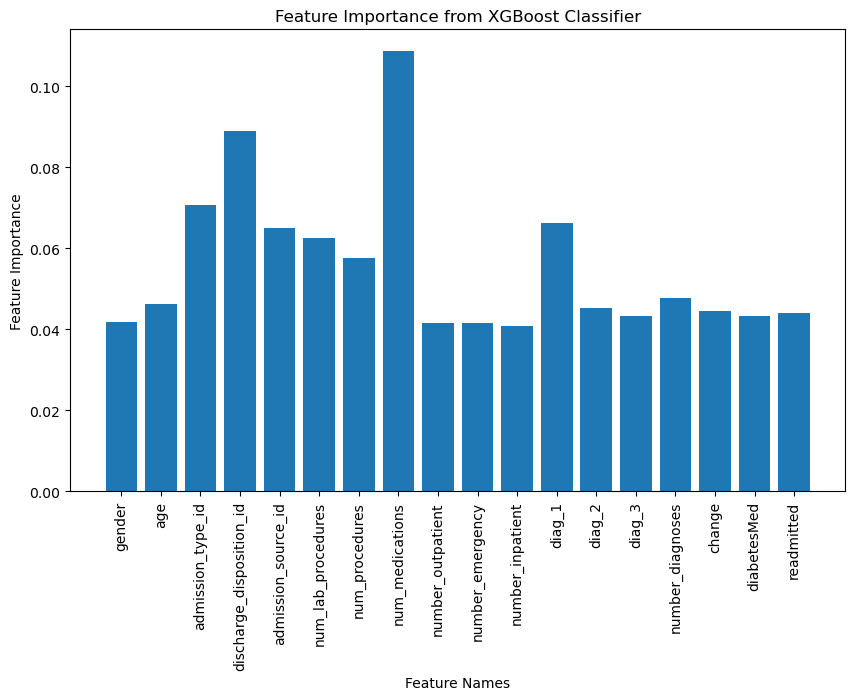

In [79]:
from xgboost import XGBClassifier

xgb_model_feature = XGBClassifier()

xgb_model_feature.fit(X_train, y_train)

feature_importances = xgb_model_feature.feature_importances_

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)), X.columns, rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importance from XGBoost Classifier')
plt.show()

In [80]:
important_features_regression = [col for col, importance in zip(X.columns, feature_importances) if importance > 0.05]
print(important_features_regression)

important_features_regression.append('time_in_hospital')

healthcare_df_important_feature_regression = healthcare_df[important_features_regression]

healthcare_df_important_feature_regression

['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1']


admission_type_id  discharge_disposition_id  admission_source_id  \
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
5                       1                         1                    1   
...                   ...                       ...                  ...   
101754                  1                         1                    7   
101755                  1                         1                    7   
101756                  1                         1                    7   
101758                  1                         1                    7   
101765                  1                         1                    7   

        num_lab_procedures  num_procedures  num_medications  diag_1  \
1                       59               0               18     3.0   
2                       11               5               13    11.0   
3                       44               1               16     1.0   
4                       51               0                8     2.0   
5                       31               6               16     7.0   
...                    ...             ...              ...     ...   
101754                  50               2               33     9.0   
101755                  73               6               26    10.0   
101756                  46               6               17    17.0   
101758                  76               1               22     5.0   
101765                  13               3                3     9.0   

        time_in_hospital  
1                      3  
2                      2  
3                      2  
4                      1  
5                      3  
...                  ...  
101754                 9  
101755                14  
101756                 2  
101758                 5  
101765                 6  

[57688 rows x 8 columns]

In [81]:
from sklearn.model_selection import train_test_split

X = healthcare_df_important_feature_regression.drop(columns=['time_in_hospital'])
y = healthcare_df_important_feature_regression['time_in_hospital']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
import xgboost
from xgboost import XGBRegressor

xgboost_model = XGBRegressor()
xgboost_model.fit(X_train, y_train)

y_pred_xgboost = xgboost_model.predict(X_test)

mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)

print(f"XGBoost Regression MAE: {mae_xgboost}")
print(f"XGBoost Regression MSE: {mse_xgboost}")

XGBoost Regression MAE: 1.7166786136763992
XGBoost Regression MSE: 5.3716059252467145


+++++++++
### **Task 3.5: Hyperparameter Tuning**
Improve the quality of your implementations


#### 3.5.1: GridSearchCV for Systematic Hyperparameter Tuning
- Define Hyperparameter Grid for Different Models
- Define grids of hyperparameters for models such as Logistic Regression (for classification) and K-Means (for clustering).

In [83]:
rf_param_grid = {
 'bootstrap': [True],
 'max_depth': [30, 40, 50],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [15, 20],
 'n_estimators': [3000,4000],
 'criterion': ['gini']
 }

In [84]:
xgboost_param_grid = {
    'n_estimators': [100, 200, 300,400,500],
    'max_depth': [6, 8, 10,15],
    'learning_rate': [0.1, 0.01, 0.05, 0.2],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1],
    'gamma': [0, 1, 5]
}

#### 3.5.2 Apply GridSearchCV with Cross-Validation
- Use GridSearchCV with cross-validation to perform hyperparameter tuning on both models.

In [86]:
from sklearn.model_selection import train_test_split

X = healthcare_df_important_feature_regression.drop(columns=['time_in_hospital'])
y = healthcare_df_important_feature_regression['time_in_hospital']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

xgboost_model = XGBRegressor()

xgboost_random = RandomizedSearchCV(estimator = xgboost_model, param_distributions = xgboost_param_grid, n_iter = 300, cv = 3, verbose=2, random_state=42, n_jobs = -1)

xgboost_random.fit(X_train, y_train)

print(xgboost_random.best_params_)

print(xgboost_random.best_score_)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
{'subsample': 0.9, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
0.413640850868759


In [88]:
from sklearn.model_selection import train_test_split

X = healthcare_df_important_feature.drop(columns=['readmitted'])
y = healthcare_df_important_feature['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_grid_search = GridSearchCV(estimator = rf_model, param_grid = rf_param_grid, cv=3, n_jobs = -1, scoring='recall')

rf_grid_search.fit(X_train, y_train)

best_params = rf_grid_search.best_params_

print(best_params)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 4000}


### Results from GridSearch (RandomForestClassifier)
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1400}

### Results after applying parameters in Classification

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(**best_params)
rf_model.fit(X_train, y_train)

scores = cross_val_score(rf_model, X, y, cv=3, scoring='recall', n_jobs=-1)

y_pred_rfc = rf_model.predict(X_test)

rfc_accuracy = accuracy_score(y_test, y_pred_rfc)
rfc_f1 = f1_score(y_test, y_pred_rfc)
rfc_precision = precision_score(y_test, y_pred_rfc)
rfc_recall = recall_score(y_test, y_pred_rfc)

print(f"avg_accuracy = {scores.mean()}")

print(f"Accuracy: {rfc_accuracy}\nF1 Score: {rfc_f1}\nPrecision: {rfc_precision}\nRecall: {rfc_recall}")

avg_accuracy = 0.20510085381463108
Accuracy: 0.62402496099844
F1 Score: 0.30614203454894434
Precision: 0.5394588500563697
Recall: 0.21371147833854398


### Results after applying parameters in Regression

In [100]:
from sklearn.model_selection import train_test_split

X = healthcare_df_important_feature_regression.drop(columns=['time_in_hospital'])
y = healthcare_df_important_feature_regression['time_in_hospital']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
from xgboost import XGBRegressor

xgboost_model = XGBRegressor(subsample = 0.9, n_estimators = 200, max_depth = 6, learning_rate = 0.05, gamma = 0, colsample_bytree = 0.8)

xgboost_model.fit(X_train, y_train)

y_pred_gboost = xgboost_model.predict(X_test)

mae_gboost = mean_absolute_error(y_test, y_pred_gboost)
mse_gboost = mean_squared_error(y_test, y_pred_gboost)

print(f"Gradient Boosting Regression MAE: {mae_gboost}")
print(f"Gradient Boosting Regression MSE: {mse_gboost}")

Gradient Boosting Regression MAE: 1.6967647900189162
Gradient Boosting Regression MSE: 5.231238664282467


In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
healthcare_df_important_feature_scaled = scaler.fit_transform(healthcare_df_important_feature)


In [92]:
db_scan_param_grid = {'eps': [0.5, 1, 2],
    'min_samples': [2, 3, 4]}

In [93]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Define the range of parameters for grid search
eps_values = [0.5, 1, 2]  # Range of epsilon values
min_samples_values = [2, 3, 4]    # Range of min_samples values

best_score = -1
best_params = {}
results = []

# Iterate over all parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        # Initialize DBSCAN with the current parameters
        model = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = model.fit_predict(healthcare_df_important_feature_scaled)

        # Calculate silhouette score only if clusters are formed
        if len(set(clusters)) > 1:
            score = silhouette_score(healthcare_df_important_feature_scaled, clusters)
            results.append((eps, min_samples, score))

            # Update the best parameters if the score is improved
            if score > best_score:
                best_score = score
                best_params = {"eps": eps, "min_samples": min_samples}

print(f"Best Parameters: {best_params}")
print(f"Best Silhouette Score: {best_score}")

# Convert results to a DataFrame for analysis (optional)

results_df = pd.DataFrame(results, columns=["eps", "min_samples", "silhouette_score"])


Best Parameters: {'eps': 0.5, 'min_samples': 2}
Best Silhouette Score: 0.9710974821671459


Results:

Best Parameters: {'eps': 0.5, 'min_samples': 2}

Best Silhouette Score: 0.9710974821671459

In [94]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

dbscan = DBSCAN(eps=0.5, min_samples=2)
y_pred_dbscan = dbscan.fit(healthcare_df_important_feature_scaled)

# Calculate the silhouette score
dbscan_score = silhouette_score(healthcare_df_important_feature_scaled, y_pred_dbscan.labels_)
print(f"Silhouette Score: {dbscan_score}")

Silhouette Score: 0.9710974821671459


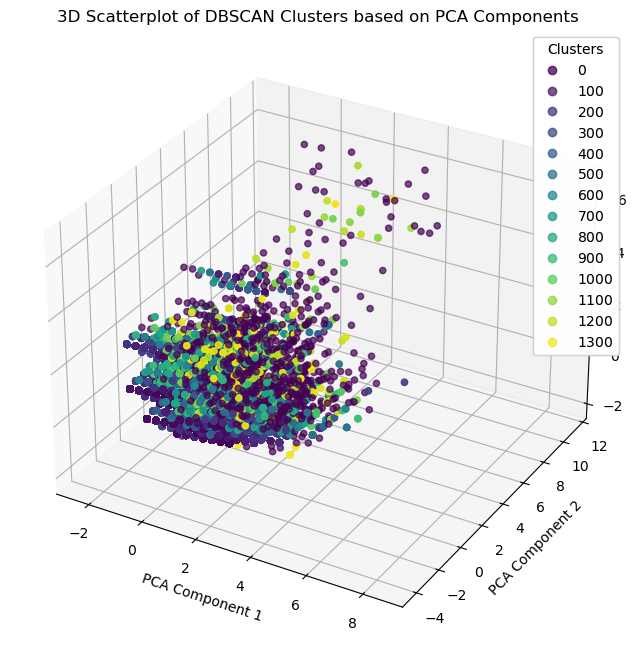

In [95]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Perform PCA to reduce the dimensionality to 3 components for 3D visualization
pca = PCA(n_components=3)
pca_components = pca.fit_transform(healthcare_df_important_feature_scaled)

# Create a DataFrame with the PCA components and the cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['Cluster'] = dbscan.labels_

# Plot the 3D scatterplot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_df['PCA1'], 
    pca_df['PCA2'], 
    pca_df['PCA3'], 
    c=pca_df['Cluster'], 
    cmap='viridis', 
    alpha=0.7
)

# Add labels and title
ax.set_title('3D Scatterplot of DBSCAN Clusters based on PCA Components')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Add legend for clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Show the plot
plt.show()


#### 3.5.3: Use Nested Cross-Validation to Validate Stability of Hyperparameters

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.model_selection import train_test_split

X = healthcare_df_important_feature.drop(columns=['readmitted'])
y = healthcare_df_important_feature['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc_model = RandomForestClassifier()

param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 40, 50],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [15, 20],
    'n_estimators': [3000,4000],
    'criterion': ['gini']
 }

# Inner CV for hyperparameter tuning
grid_search = GridSearchCV(rfc_model, param_grid, cv=3, n_jobs=-1, scoring='recall')

# Outer CV for model evaluation
outer_cv = KFold(n_splits=3)

# Nested CV
nested_score = cross_val_score(grid_search, X, y, cv=outer_cv, scoring= 'recall')

print("Nested CV Score: ", nested_score.mean())

Nested CV Score:  0.2558699519849534


#### 3.5.4: Evaluate Tuned Models with Multiple Metrics
- Evaluate the tuned Logistic Regression model on both training and test sets.
- Use multiple metrics for classification (accuracy, F1-score) and clustering (silhouette score, Calinski-Harabasz).

###  Regression Error Analysis

In [159]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor



X = healthcare_df_important_feature_regression.drop(columns=['time_in_hospital'])
y = healthcare_df_important_feature_regression['time_in_hospital']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


xgboost_model = XGBRegressor()
xgboost_model.fit(X_train, y_train)

# Predictions and true values
y_pred_xgboost = xgboost_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_xgboost)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_xgboost)
r2 = r2_score(y_test, y_pred_xgboost)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")


MSE: 5.3716059252467145
RMSE: 2.3176725232971793
MAE: 1.7166786136763992
R-squared: 0.39289613347050456


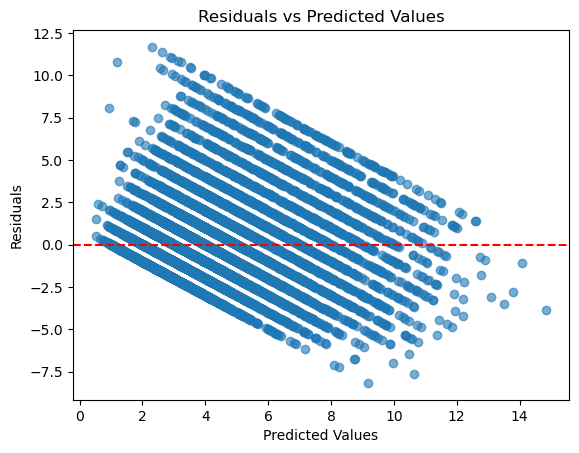

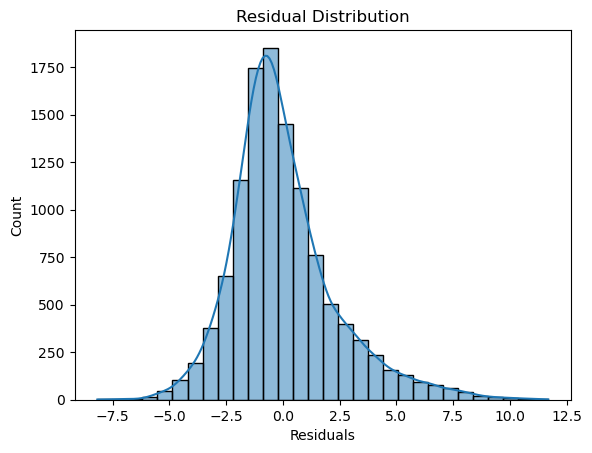

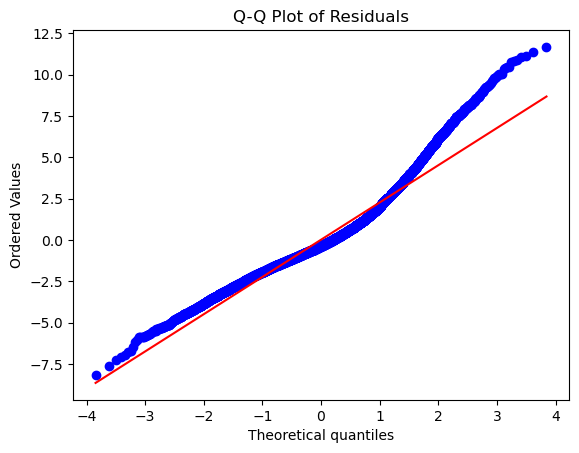

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred_xgboost

# Residual vs Predicted
plt.scatter(y_pred_xgboost, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Residual Histogram
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.show()

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


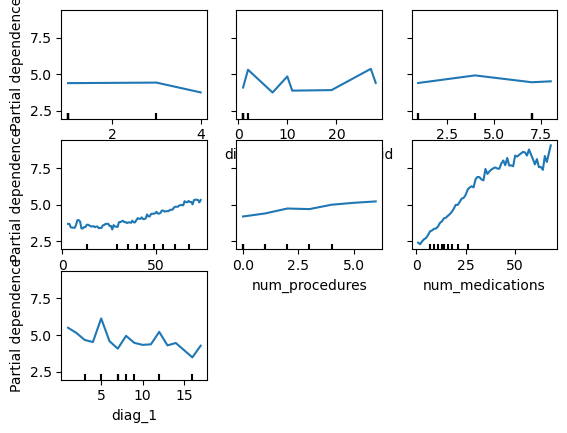

 99%|===================| 11459/11538 [00:25<00:00]        

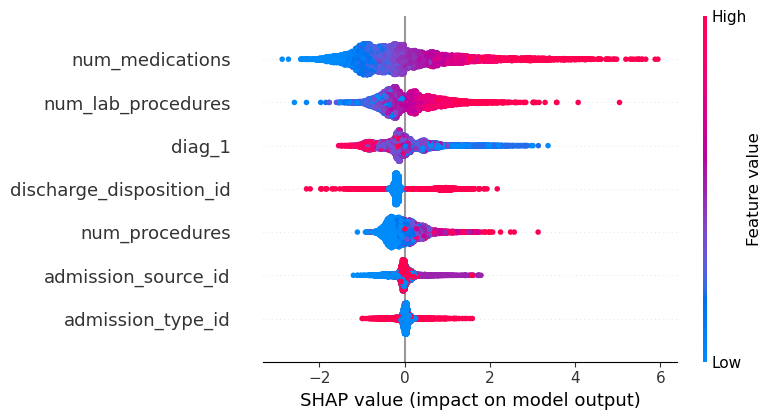

In [161]:
from sklearn.inspection import PartialDependenceDisplay
import shap

# Partial Dependence Plot
PartialDependenceDisplay.from_estimator(xgboost_model, X_test, [0,1,2,3,4,5,6]) 
plt.show()

# SHAP Analysis
explainer = shap.Explainer(xgboost_model, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


C:\Users\filip\AppData\Local\Temp\ipykernel_35048\276321335.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_error = residuals.groupby(segment).mean()


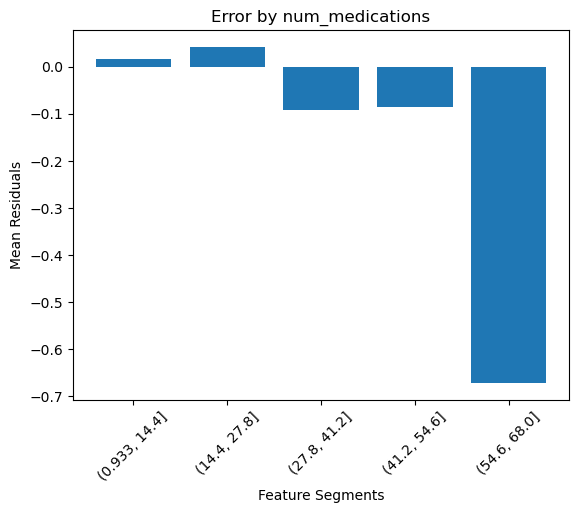

In [162]:
# Error vs Feature
feature = 'num_medications'  
segment = pd.cut(X_test[feature], bins=5)  
segment_error = residuals.groupby(segment).mean()

plt.bar(segment_error.index.astype(str), segment_error)
plt.xlabel('Feature Segments')
plt.ylabel('Mean Residuals')
plt.title(f'Error by {feature}')
plt.xticks(rotation=45)
plt.show()


In [163]:
from sklearn.model_selection import cross_val_predict

# Cross-validation predictions
cv_predictions = cross_val_predict(xgboost_model, X, y, cv=5)

# Residuals from cross-validation
cv_residuals = y - cv_predictions

# Compare training and validation errors
cv_mse = mean_squared_error(y, cv_predictions)
cv_rmse = np.sqrt(cv_mse)
cv_r2 = r2_score(y, cv_predictions)

print(f"Cross-Validation MSE: {cv_mse}")
print(f"Cross-Validation RMSE: {cv_rmse}")
print(f"Cross-Validation R-squared: {cv_r2}")


Cross-Validation MSE: 5.358908127974946
Cross-Validation RMSE: 2.314931560106032
Cross-Validation R-squared: 0.38159762526142726


### Classification Error Analysis

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X = healthcare_df_important_feature.drop(columns=['readmitted'])
y = healthcare_df_important_feature['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(bootstrap =True, criterion= 'entropy', max_depth = 10, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 10, n_estimators = 1400)
rf_model.fit(X_train, y_train)

scores = cross_val_score(rf_model, X, y, cv=3, scoring='recall')

y_pred_rfc = rf_model.predict(X_test)

rfc_accuracy = accuracy_score(y_test, y_pred_rfc)
rfc_f1 = f1_score(y_test, y_pred_rfc)
rfc_precision = precision_score(y_test, y_pred_rfc)
rfc_recall = recall_score(y_test, y_pred_rfc)

print(f"avg_recall= {scores.mean()}")

print(f"Accuracy: {rfc_accuracy}\nF1 Score: {rfc_f1}\nPrecision: {rfc_precision}\nRecall: {rfc_recall}")

avg_recall= 0.1961589374024999
Accuracy: 0.6270584156699601
F1 Score: 0.2949369162706865
Precision: 0.5538461538461539
Recall: 0.2009825815096025


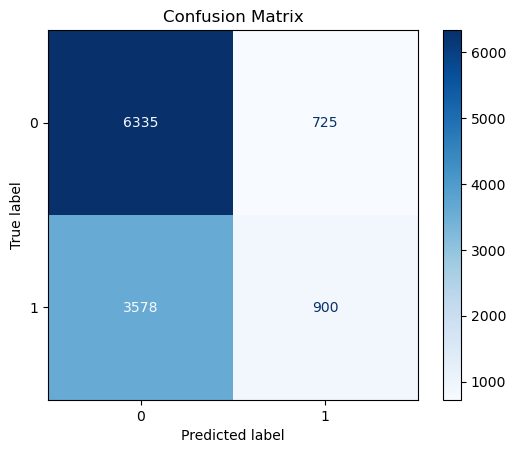

In [165]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [166]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rfc))


              precision    recall  f1-score   support

           0       0.64      0.90      0.75      7060
           1       0.55      0.20      0.29      4478

    accuracy                           0.63     11538
   macro avg       0.60      0.55      0.52     11538
weighted avg       0.61      0.63      0.57     11538



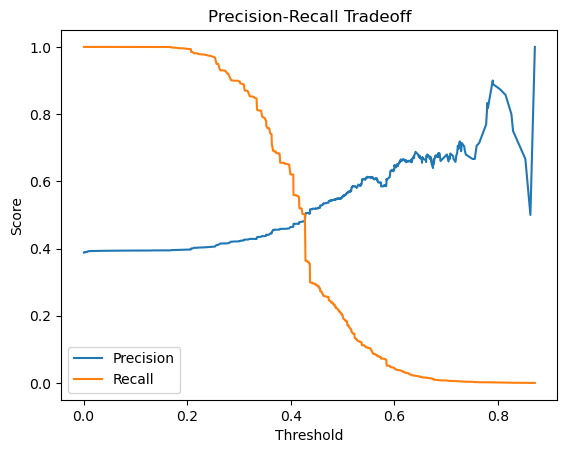

In [171]:
from sklearn.metrics import precision_recall_curve

# Get precision-recall values
precision, recall, thresholds = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

# Visualize precision-recall tradeoff
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall Tradeoff')
plt.show()


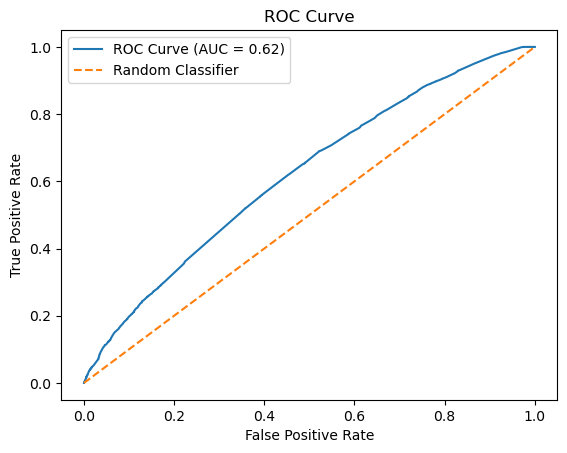

In [172]:
from sklearn.metrics import roc_curve, auc

prob_pred = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, prob_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


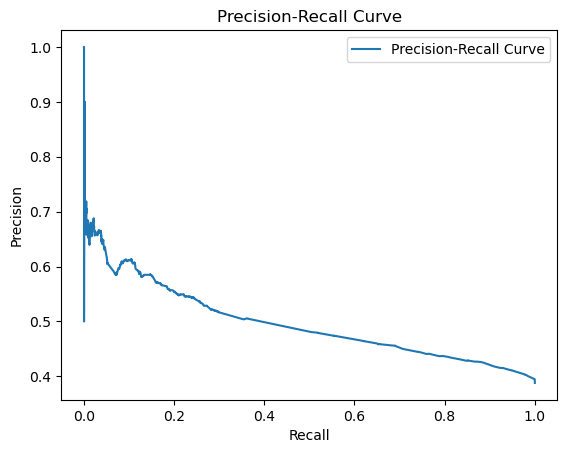

In [173]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, prob_pred)
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


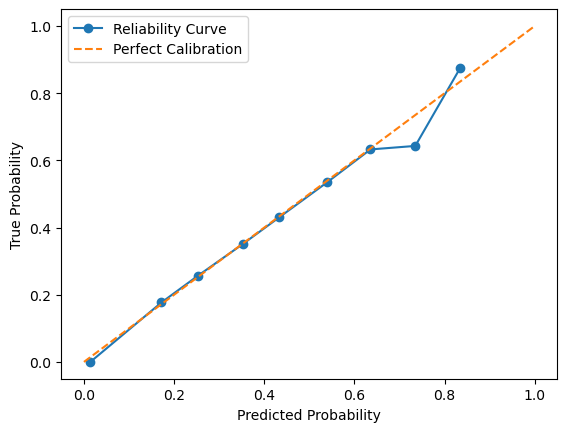

In [174]:
from sklearn.calibration import calibration_curve

prob_pred = rf_model.predict_proba(X_test)[:, 1]  # For binary classification
true_prob, predicted_prob = calibration_curve(y_test, prob_pred, n_bins=10)

plt.plot(predicted_prob, true_prob, marker="o", label="Reliability Curve")
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfect Calibration")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.legend()
plt.show()


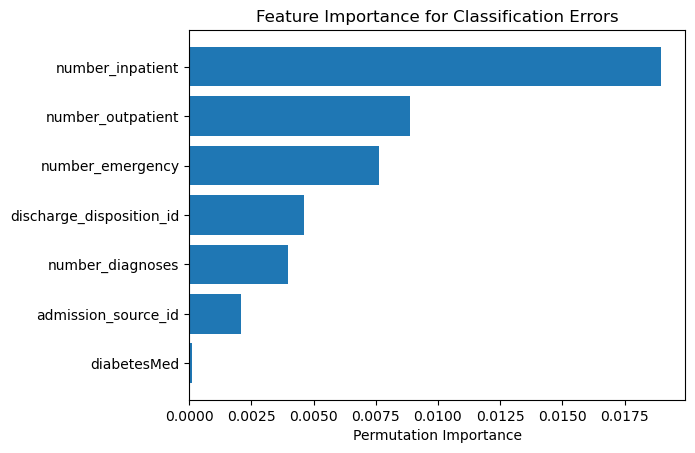

In [175]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_model, X_test, y_test, scoring='accuracy')
sorted_idx = result.importances_mean.argsort()

plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance for Classification Errors")
plt.show()


### Clustering Error Analysis

In [176]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score


import matplotlib.pyplot as plt

dbscan = DBSCAN(eps=0.5, min_samples=2)
y_pred_dbscan = dbscan.fit(healthcare_df_important_feature_scaled)

# Calculate the silhouette score
dbscan_score = silhouette_score(healthcare_df_important_feature_scaled, y_pred_dbscan.labels_)
dbscan_score_davies = davies_bouldin_score(healthcare_df_important_feature_scaled, y_pred_dbscan.labels_)
dbscan_score_calinski = calinski_harabasz_score(healthcare_df_important_feature_scaled, y_pred_dbscan.labels_)

print("Davies-Bouldin Index:", dbscan_score_davies)
print(f"Silhouette Score: {dbscan_score}")
print("Calinski-Harabasz Index:", dbscan_score_calinski)    

Davies-Bouldin Index: 1.184680915041293
Silhouette Score: 0.9710974821671459
Calinski-Harabasz Index: 667.5567969021658


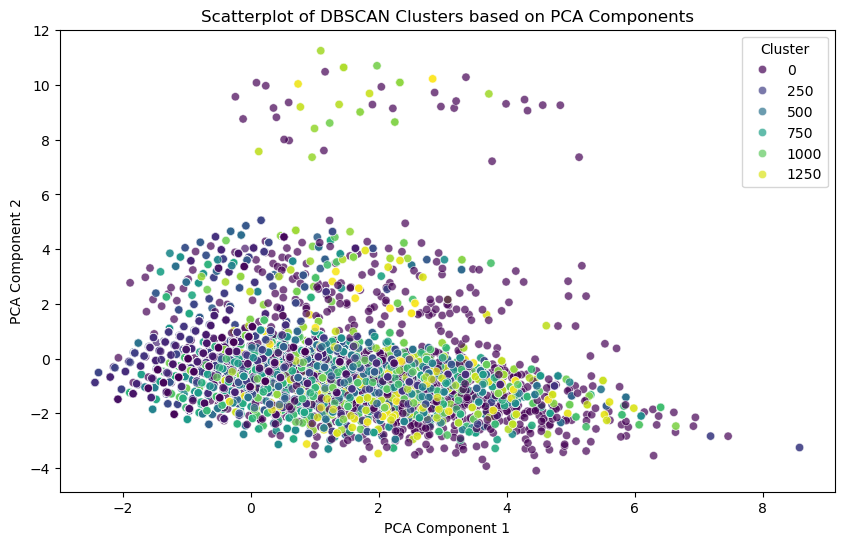

In [177]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Perform PCA to reduce the dimensionality to 2 components for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(healthcare_df_important_feature_scaled)

# Create a DataFrame with the PCA components and the cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = dbscan.labels_

# Plot the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=pca_df, alpha=0.7)
plt.title('Scatterplot of DBSCAN Clusters based on PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


+++++++++
### **Task 3.6: Model Selection**
- Compare and evaluate the implemented models and select the best ones.

RandomSearchCV results: Best Parameters:  {'n_estimators': 3000, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'gini', 'bootstrap': True}

#### 3.6.1: Compare and Choose the Best Model
- Compare the models using evaluation metrics (e.g., MSE for regression, F1-score for classification, Silhouette Score for clustering).
- Summarise the performance metrics of each model in a table and choose the model with the best performance for each task.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Load data
healthcare_df = pd.read_csv("../Diabetes/diabetic_data.csv")

encoder = OneHotEncoder(sparse_output=False)

healthcare_df = healthcare_df.drop_duplicates(subset = "patient_nbr")

healthcare_df['change'] = healthcare_df['change'].replace('Ch', 1)
healthcare_df['change'] = healthcare_df['change'].replace('No', 0)

healthcare_df['diabetesMed'] = healthcare_df['diabetesMed'].replace('Yes', 1)
healthcare_df['diabetesMed'] = healthcare_df['diabetesMed'].replace('No', 0)
healthcare_df['readmitted'] = healthcare_df['readmitted'].replace('>30', 1)
healthcare_df['readmitted'] = healthcare_df['readmitted'].replace('<30', 1)
healthcare_df['readmitted'] = healthcare_df['readmitted'].replace('NO', 0)

healthcare_df[['diag_1', 'diag_2', 'diag_3']] = healthcare_df[['diag_1', 'diag_2', 'diag_3']].apply(lambda col: col.str.replace('V', '', regex=False))
healthcare_df[['diag_1', 'diag_2', 'diag_3']] = healthcare_df[['diag_1', 'diag_2', 'diag_3']].apply(lambda col: col.str.replace('E', '', regex=False))
healthcare_df[['diag_1', 'diag_2', 'diag_3']] = healthcare_df[['diag_1', 'diag_2', 'diag_3']].apply(lambda col: col.str.replace('>', '', regex=False))

for i in range(0,10):
    healthcare_df['age'] = healthcare_df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i*10+5)
    
#Drop unnecessary columns
healthcare_df.drop(columns = ["encounter_id", "patient_nbr", "weight", "payer_code", "medical_specialty", "race", "max_glu_serum", "A1Cresult", "metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"], inplace = True)

#Drop rows with missing values
healthcare_df = healthcare_df.drop(healthcare_df[(healthcare_df['diag_1'] == '?') | (healthcare_df['diag_2'] == '?') | (healthcare_df['diag_3'] == '?')].index)

healthcare_df = healthcare_df.drop(healthcare_df['gender'][healthcare_df['gender'] == 'Unknown/Invalid'].index)

# Ensure "gender" is passed as a 2D array (use double brackets)
gender_encoded = encoder.fit_transform(healthcare_df[["gender"]])

# Create a DataFrame for the encoded columns with appropriate column names
gender_encoded_df = pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(["gender"]))

# Concatenate the original DataFrame with the encoded DataFrame
healthcare_df = pd.concat([healthcare_df, gender_encoded_df], axis=1)
#Remove outliers
def remove_outliers(data, columns):
    df = data.copy()
    
    for col in columns: 
        Q1 = df[col].quantile(0.05)
        Q3 = df[col].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
       
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

outlier_cols = ["num_lab_procedures", "num_procedures", "num_medications", "number_outpatient", "number_emergency", "number_inpatient", "number_diagnoses", "time_in_hospital"]
healthcare_df = remove_outliers(healthcare_df, outlier_cols)

#Remap IDs
healthcare_df["admission_type_id"] = healthcare_df["admission_type_id"].replace([5,6,8], np.nan)

healthcare_df["discharge_disposition_id"] = healthcare_df["discharge_disposition_id"].replace([18,25,26], np.nan)

healthcare_df["admission_source_id"] = healthcare_df["admission_source_id"].replace([9,15,17,20,21], np.nan)

healthcare_df['admission_type_id'] = healthcare_df['admission_type_id'].replace(2,1)
healthcare_df['admission_type_id'] = healthcare_df['admission_type_id'].replace(7,1)
healthcare_df['admission_type_id'] = healthcare_df['admission_type_id'].replace(6,5)
healthcare_df['admission_type_id'] = healthcare_df['admission_type_id'].replace(8,5)

healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(6,1)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(8,1)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(9,1)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(13,1)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(3,2)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(4,2)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(5,2)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(14,2)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(22,2)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(23,2)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(24,2)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(12,10)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(15,10)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(16,10)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(17,10)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(25,18)
healthcare_df['discharge_disposition_id'] = healthcare_df['discharge_disposition_id'].replace(26,18)
healthcare_df
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(2,1)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(3,1)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(5,4)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(6,4)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(10,4)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(22,4)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(25,4)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(15,9)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(17,9)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(20,9)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(21,9)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(13,11)
healthcare_df['admission_source_id'] = healthcare_df['admission_source_id'].replace(14,11)

#Drop missing
healthcare_df.dropna(inplace = True)

#Remap diagnosis
healthcare_df['diag_1'] = healthcare_df['diag_1'].astype(float)
healthcare_df['diag_2'] = healthcare_df['diag_2'].astype(float)
healthcare_df['diag_3'] = healthcare_df['diag_3'].astype(float)


healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=1) & (healthcare_df['diag_1']< 140)] = 1
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=140) & (healthcare_df['diag_1']< 240)] = 2
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=240) & (healthcare_df['diag_1']< 280)] = 3
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=280) & (healthcare_df['diag_1']< 290)] = 4
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=290) & (healthcare_df['diag_1']< 320)] = 5
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=320) & (healthcare_df['diag_1']< 390)] = 6
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=390) & (healthcare_df['diag_1']< 460)] = 7
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=460) & (healthcare_df['diag_1']< 520)] = 8
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=520) & (healthcare_df['diag_1']< 580)] = 9
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=580) & (healthcare_df['diag_1']< 630)] = 10
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=630) & (healthcare_df['diag_1']< 680)] = 11
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=680) & (healthcare_df['diag_1']< 710)] = 12
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=710) & (healthcare_df['diag_1']< 740)] = 13
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=740) & (healthcare_df['diag_1']< 760)] = 14
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=760) & (healthcare_df['diag_1']< 780)] = 15
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=780) & (healthcare_df['diag_1']< 800)] = 16
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']>=800) & (healthcare_df['diag_1']< 1000)] = 17
healthcare_df['diag_1'].loc[(healthcare_df['diag_1']==-1)] = 0
healthcare_df
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=1) & (healthcare_df['diag_2']< 140)] = 1
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=140) & (healthcare_df['diag_2']< 240)] = 2
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=240) & (healthcare_df['diag_2']< 280)] = 3
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=280) & (healthcare_df['diag_2']< 290)] = 4
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=290) & (healthcare_df['diag_2']< 320)] = 5
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=320) & (healthcare_df['diag_2']< 390)] = 6
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=390) & (healthcare_df['diag_2']< 460)] = 7
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=460) & (healthcare_df['diag_2']< 520)] = 8
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=520) & (healthcare_df['diag_2']< 580)] = 9
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=580) & (healthcare_df['diag_2']< 630)] = 10
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=630) & (healthcare_df['diag_2']< 680)] = 11
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=680) & (healthcare_df['diag_2']< 710)] = 12
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=710) & (healthcare_df['diag_2']< 740)] = 13
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=740) & (healthcare_df['diag_2']< 760)] = 14
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=760) & (healthcare_df['diag_2']< 780)] = 15
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=780) & (healthcare_df['diag_2']< 800)] = 16
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']>=800) & (healthcare_df['diag_2']< 1000)] = 17
healthcare_df['diag_2'].loc[(healthcare_df['diag_2']==-1)] = 0
healthcare_df
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=1) & (healthcare_df['diag_3']< 140)] = 1
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=140) & (healthcare_df['diag_3']< 240)] = 2
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=240) & (healthcare_df['diag_3']< 280)] = 3
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=280) & (healthcare_df['diag_3']< 290)] = 4
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=290) & (healthcare_df['diag_3']< 320)] = 5
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=320) & (healthcare_df['diag_3']< 390)] = 6
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=390) & (healthcare_df['diag_3']< 460)] = 7
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=460) & (healthcare_df['diag_3']< 520)] = 8
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=520) & (healthcare_df['diag_3']< 580)] = 9
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=580) & (healthcare_df['diag_3']< 630)] = 10
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=630) & (healthcare_df['diag_3']< 680)] = 11
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=680) & (healthcare_df['diag_3']< 710)] = 12
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=710) & (healthcare_df['diag_3']< 740)] = 13
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=740) & (healthcare_df['diag_3']< 760)] = 14
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=760) & (healthcare_df['diag_3']< 780)] = 15
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=780) & (healthcare_df['diag_3']< 800)] = 16
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']>=800) & (healthcare_df['diag_3']< 1000)] = 17
healthcare_df['diag_3'].loc[(healthcare_df['diag_3']==-1)] = 0

healthcare_df = healthcare_df.drop(columns=["gender"])

healthcare_df = healthcare_df.astype(int)

C:\Users\filip\AppData\Local\Temp\ipykernel_11372\3012416291.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  healthcare_df['change'] = healthcare_df['change'].replace('No', 0)
C:\Users\filip\AppData\Local\Temp\ipykernel_11372\3012416291.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  healthcare_df['diabetesMed'] = healthcare_df['diabetesMed'].replace('No', 0)
C:\Users\filip\AppData\Local\Temp\ipykernel_11372\3012416291.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future v

In [3]:
from sklearn.model_selection import train_test_split

# Defining target and features 
X = healthcare_df.drop(columns=['readmitted'])
y = healthcare_df['readmitted']

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
healthcare_df["readmitted"].value_counts()

readmitted
0    22670
1    16756
Name: count, dtype: int64

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rfc = rf_model.predict(X_test)

rfc_accuracy = accuracy_score(y_test, y_pred_rfc)
rfc_f1 = f1_score(y_test, y_pred_rfc)
rfc_precision = precision_score(y_test, y_pred_rfc)
rfc_recall = recall_score(y_test, y_pred_rfc)

print(f"Accuracy: {rfc_accuracy}\nF1 Score: {rfc_f1}\nPrecision: {rfc_precision}\nRecall: {rfc_recall}")

Accuracy: 0.613999492772001
F1 Score: 0.47079276773296247
Precision: 0.5727580372250423
Recall: 0.39964580873671784


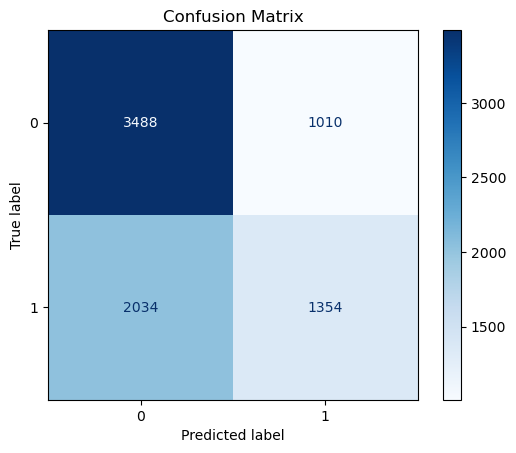

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

weight_dict = {0: 0.6, 1: 1.5}

rfc_model_final_1 = RandomForestClassifier(n_estimators = 3000, min_samples_split = 15, min_samples_leaf=1, max_features = 'sqrt', max_depth = 30, criterion= 'gini', bootstrap = True, class_weight = weight_dict, n_jobs=-1)

rfc_model_final_1.fit(X_train, y_train)

y_pred_rfc_final = rfc_model_final_1.predict(X_test)

nested_score = cross_val_score(rfc_model_final_1, X, y, cv=3, scoring='recall', n_jobs=-1)

rfc_model_final_accuracy = accuracy_score(y_test, y_pred_rfc_final)
rfc_model_final_f1 = f1_score(y_test, y_pred_rfc_final)
rfc_model_final_precision = precision_score(y_test, y_pred_rfc_final)
rfc_model_final_recall = recall_score(y_test, y_pred_rfc_final)

print("Nested CV Score: ", nested_score.mean())
print(f"Accuracy: {rfc_model_final_accuracy}\nF1 Score: {rfc_model_final_f1}\nPrecision: {rfc_model_final_precision}\nRecall: {rfc_model_final_recall}")

Nested CV Score:  0.7528693734164887
Accuracy: 0.5841998478316003
F1 Score: 0.6099678839062685
Precision: 0.5108587368001594
Recall: 0.7567886658795749


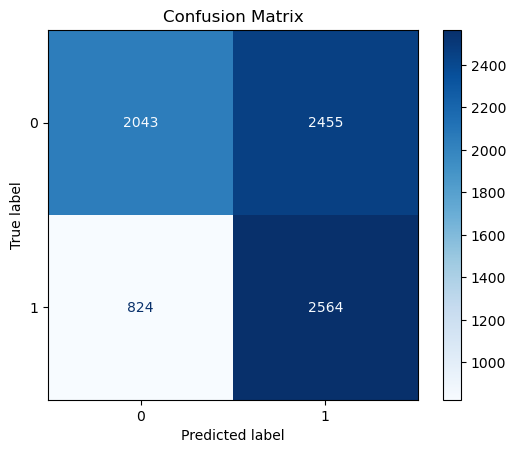

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_rfc_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc_model_final_1.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

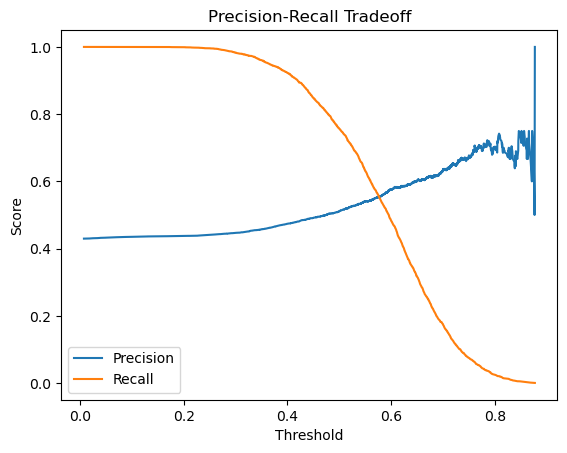

In [10]:
from sklearn.metrics import precision_recall_curve

# Get precision-recall values
precision, recall, thresholds = precision_recall_curve(y_test, rfc_model_final_1.predict_proba(X_test)[:, 1])

# Visualize precision-recall tradeoff
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall Tradeoff')
plt.show()


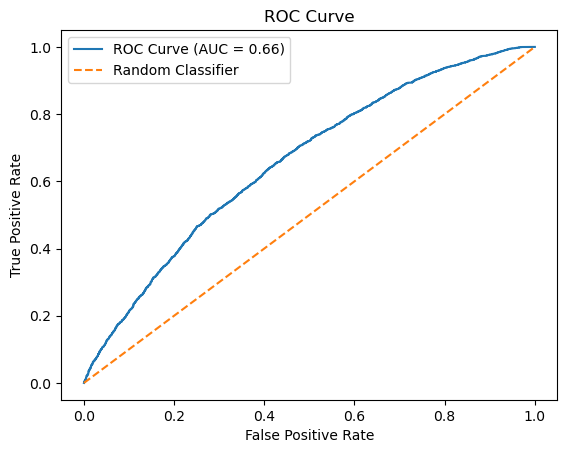

In [11]:
from sklearn.metrics import roc_curve, auc

prob_pred = rfc_model_final_1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, prob_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


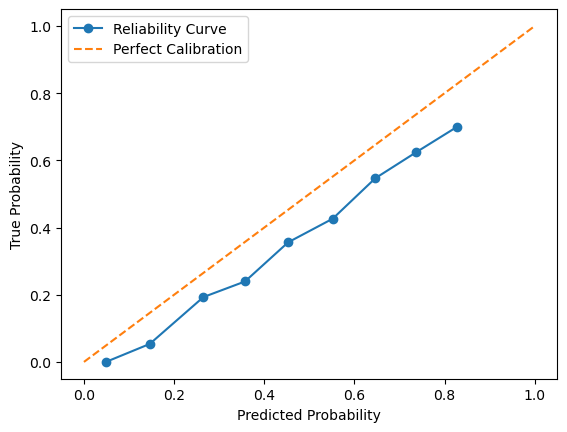

In [12]:
from sklearn.calibration import calibration_curve

prob_pred = rfc_model_final_1.predict_proba(X_test)[:, 1]  # For binary classification
true_prob, predicted_prob = calibration_curve(y_test, prob_pred, n_bins=10)

plt.plot(predicted_prob, true_prob, marker="o", label="Reliability Curve")
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfect Calibration")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.legend()
plt.show()


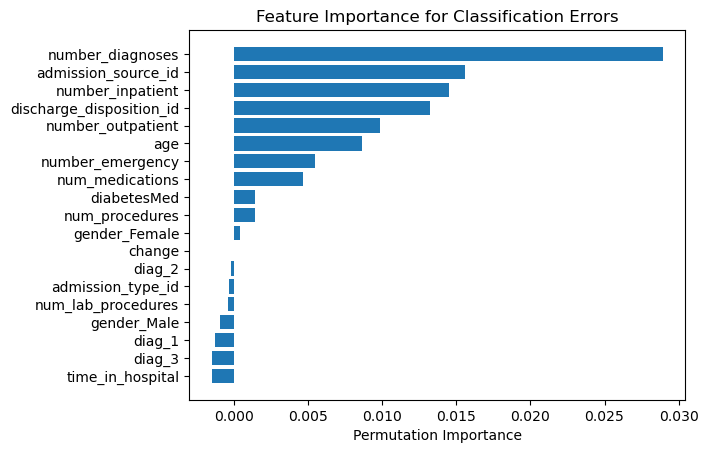

In [13]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rfc_model_final_1, X_test, y_test, scoring='accuracy')
sorted_idx = result.importances_mean.argsort()

plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance for Classification Errors")
plt.show()


#### 3.6.2: Finalise and Save the Best Model for Each Task
- Once the best model is identified, retrain it on the full dataset and save it using joblib for future use.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, KFold
from sklearn.model_selection import train_test_split

# Defining target and features 
X = healthcare_df.drop(columns=['readmitted'])
y = healthcare_df['readmitted']

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'class_weight': [{0:0.4, 1:1.5},{0: 0.6, 1: 1.5}, {0: 0.7, 1: 1.5}, {0: 0.8, 1: 1.5}, {0: 0.9, 1: 1.5}, {0: 1, 1: 1.5}],
    'n_estimators': [3000, 4000, 5000, 6000, 7000, 8000],
    'max_depth': [30, 40, 50, 60, 70],
    'max_features': ['sqrt'],
    'min_samples_split': [15, 20, 25, 30, 40],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True],
    'criterion': ['gini']
}

final_model = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object

rfc_random_search = RandomizedSearchCV(final_model, param_distributions=param_grid, n_iter=50, cv=3, scoring='f1', n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object
rfc_random_search.fit(X_train, y_train)

# Get the best parameters

best_params = rfc_random_search.best_params_

# Get the best score
best_score = rfc_random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'n_estimators': 7000, 'min_samples_split': 40, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 60, 'criterion': 'gini', 'class_weight': {0: 0.6, 1: 1.5}, 'bootstrap': True}
Best Score: 0.6193173763695986


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

weight_dict = {0: 0.4, 1: 1.5}

rfc_model_final = RandomForestClassifier(n_estimators = 4000, min_samples_split = 30, min_samples_leaf=2, max_features = 'sqrt', max_depth = 70, criterion= 'gini', bootstrap = True, class_weight = weight_dict, n_jobs=-1)

rfc_model_final.fit(X_train, y_train)

y_pred_rfc_final = rfc_model_final.predict(X_test)

nested_score = cross_val_score(rfc_model_final, X, y, cv=3, scoring='recall', n_jobs=-1)

rfc_model_final_accuracy = accuracy_score(y_test, y_pred_rfc_final)
rfc_model_final_f1 = f1_score(y_test, y_pred_rfc_final)
rfc_model_final_precision = precision_score(y_test, y_pred_rfc_final)
rfc_model_final_recall = recall_score(y_test, y_pred_rfc_final)

print("Nested CV Score: ", nested_score.mean())
print(f"Accuracy: {rfc_model_final_accuracy}\nF1 Score: {rfc_model_final_f1}\nPrecision: {rfc_model_final_precision}\nRecall: {rfc_model_final_recall}")

Nested CV Score:  0.9236731146620013
Accuracy: 0.5197818919604362
F1 Score: 0.6242682805833912
Precision: 0.4701838290240622
Recall: 0.9285714285714286


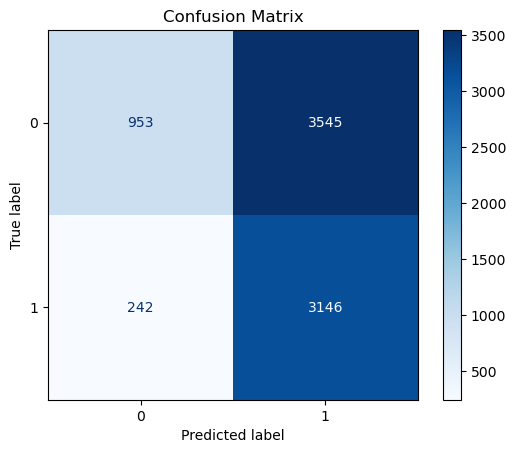

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_rfc_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

weight_dict = {0: 0.6, 1: 1.5}

rfc_model_final = RandomForestClassifier(n_estimators = 7000, min_samples_split = 40, min_samples_leaf=2, max_features = 'sqrt', max_depth = 60, criterion= 'gini', bootstrap = True, class_weight = weight_dict, n_jobs=-1)

rfc_model_final.fit(X_train, y_train)

y_pred_rfc_final = rfc_model_final.predict(X_test)

nested_score = cross_val_score(rfc_model_final, X, y, cv=3, scoring='recall', n_jobs=-1)

rfc_model_final_accuracy = accuracy_score(y_test, y_pred_rfc_final)
rfc_model_final_f1 = f1_score(y_test, y_pred_rfc_final)
rfc_model_final_precision = precision_score(y_test, y_pred_rfc_final)
rfc_model_final_recall = recall_score(y_test, y_pred_rfc_final)

print("Nested CV Score: ", nested_score.mean())
print(f"Accuracy: {rfc_model_final_accuracy}\nF1 Score: {rfc_model_final_f1}\nPrecision: {rfc_model_final_precision}\nRecall: {rfc_model_final_recall}")

Nested CV Score:  0.8672162351566772
Accuracy: 0.558458026883084
F1 Score: 0.6280709250160222
Precision: 0.4921325744894543
Recall: 0.8677685950413223


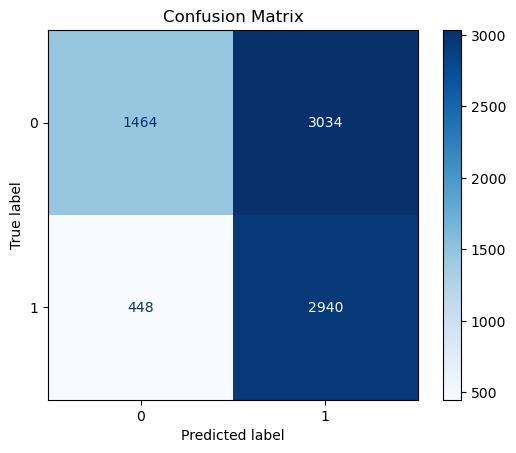

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_rfc_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [7]:
import joblib

# Save the best model
joblib.dump(rfc_model_final_1, "RandomForestBestModel.pkl")

['RandomForestBestModel.pkl']

____________
## *Task 4: Mathematics for Machine Learning

#### 4.1: Optimization Algorithms

- Add a link to your Jupyter notebook file [`AlgebraicExample.ipynb`](https://github.com/BredaUniversityADSAI/2024-25b-fai1-adsai-0FilipSarik243537/blob/main/Deliverables/AlgebraicExample_temp_Finished.ipynb)

#### 4.2: Implementing Linear Regression with Numpy from Scratch

- Add a link to your Jupyter notebook file [`LinearRegression.ipynb`](https://github.com/BredaUniversityADSAI/2024-25b-fai1-adsai-0FilipSarik243537/blob/main/Deliverables/LinearRegression_temp_Finished.ipynb)

#### 4.3: Implement Logistic Regression with Numpy from Scratch

- Add a link to your Jupyter notebook file [`LogisticRegression.ipynb`](https://github.com/BredaUniversityADSAI/2024-25b-fai1-adsai-0FilipSarik243537/blob/main/Deliverables/LogisticRegression_temp_Finished.ipynb)

____________
## *Task 5: Final Report for Your Creative Brief Project
- Add a link to your [`FinalReport_FilipSarik_243537.pdf`](https://github.com/BredaUniversityADSAI/2024-25b-fai1-adsai-0FilipSarik243537/blob/main/Deliverables/FinalReport_FilipSarik_243537.pdf) here!

### Checklist

1.1 Data Preprocessing

Checklist:
    
    Ensure data is cleaned (missing values handled, duplicates removed).        DONE

    Normalize or standardize features if required (e.g., for algorithms like SVM or k-NN).          DONE

    Encode categorical variables (one-hot encoding, label encoding).            DONE

    Handle class imbalances (oversampling, undersampling, or SMOTE for classification tasks).       DONE


1.2 Outlier Detection and Treatment

Checklist:

    Visualize outliers using boxplots, scatter plots, or histograms.            DONE

    Detect outliers using statistical methods (Z-score, IQR) or advanced techniques (Isolation Forest, DBSCAN).         DONE

    Decide on a strategy: remove, transform, or cap them.           DONE

    Importance: Outliers can disproportionately affect model performance and skew results.


1.3 Feature Engineering and Selection

Checklist:

    Create new meaningful features (e.g., polynomial features, interaction terms).      DONE

    Perform feature selection using statistical tests, correlation analysis, or algorithms like Recursive Feature Elimination (RFE).        DONE

    Importance: Enhances model interpretability and reduces overfitting by focusing on the most relevant features.      DONE


1.4 Feature Transformation

Checklist:
    Apply transformations like log, square root, or Box-Cox for skewed data.        DONE

    Use dimensionality reduction techniques (PCA, t-SNE) if necessary.      DONE

    Importance: Ensures data distribution aligns with model assumptions and improves performance.


1.5 Splitting Data

Checklist:

    Split data into training, validation, and test sets (e.g., 70-15-15 split).

    Ensure stratified splits for imbalanced classification datasets.        DONE

    Importance: Prevents data leakage and ensures reliable evaluation of the model’s generalization ability.


1.6 Cross-Validation

Checklist:

    Use k-fold cross-validation or leave-one-out cross-validation (LOOCV).      DONE

    Importance: Mitigates overfitting and provides a more robust evaluation of model performance.


1.7 Model Training and Hyperparameter Tuning

Checklist:

    Experiment with different algorithms and architectures.     DONE

    Use grid search, random search, or Bayesian optimization for hyperparameter tuning.     DONE

    Regularize models (L1, L2 penalties) to control complexity.     DONE

    Importance: Ensures the model is well-suited for the data and problem at hand.

1.8 Performance Evaluation

Checklist:

    Use appropriate metrics:

    Regression: RMSE, MAE, R².      DONE

    Classification: Accuracy, Precision, Recall, F1 Score, ROC-AUC.         DONE

    Clustering: Silhouette score, Davies-Bouldin Index.         DONE

    Analyze residuals or error distribution.        DONE

    Perform sensitivity analysis for critical features.         DONE

    Importance: Highlights strengths and weaknesses of the model.

1.9 Error Analysis

Checklist:

    Identify patterns in errors (e.g., specific classes or ranges where performance drops).         DONE

    Check for bias or unfairness in predictions.

    Importance: Helps refine the model and ensures fairness and reliability.

1.10 Model Interpretability

Checklist:

    Use tools like SHAP or LIME to explain predictions.         DONE

    Visualize decision boundaries for classifiers.

    Importance: Ensures trustworthiness and insight into model behavior.